# Statisticl Data Analysis
    Shape of data
    Distribution of data
    Imbalance
    Few questions
    Hypothesis Tests
    Time series - Number of time periods
    Stationarity
    Seasonality
    Auto Correlation

# Exploratory Data Analysis
    Correlations
        Bi-variate
        Multi-variate
    Comparisions
    Outlier detection
        - Time series
        - ISO
        - 1-class SVM
        - Clustering
    Dynamic Time Warping
    
    
    %%html
<style>
div.input {
    display:none;
}
</style>
    
    
    





In [41]:
import sys
sys.path.insert(0,'..\pyod')

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sns
from matplotlib import pyplot as plt
import datasets
# plt.rcParams["figure.figsize"] = (40,10)


# statsmodels==0.12.2
# seaborn==0.12.2
# scipy==1.7.3
# scikit-learn==0.24.0
# numpy==1.20.0
# matplotlib==3.5.3
# datasets==2.11.0
# pyod==0.8.6
# pandas==1.3.0

In [43]:
import sklearn
sklearn.__version__

'1.0.2'

In [44]:
#Fetch data 
df=pd.read_csv("data/house-prices-advanced-regression-techniques/train.csv") #Regression
nyc=pd.read_csv("data/bus-breakdown-and-delays.csv") #Regression
stores=pd.read_csv("data/store-sales-time-series-forecasting/train.csv") #Time Series Forecasting


C:\Users\ankommar\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Supervised Learning setup

## Lets assume we are predicting the house price with the given data set

### Explore the variables



### Univariate Analysis

#### Explore a single variable to understand the shape, distribution, and summary statistics
#### Goal is to understand the usability of a the variable in creating inputs to the model


### Continous value as Target

In [45]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [46]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

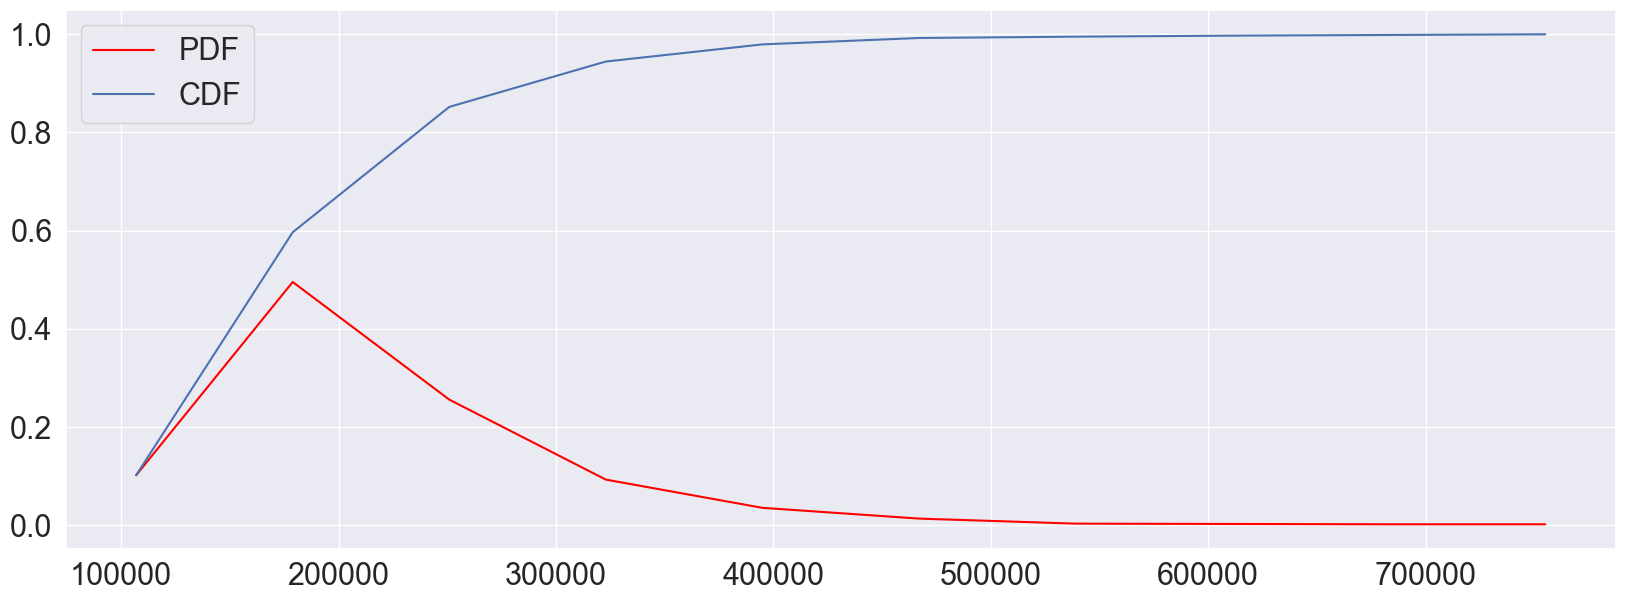

In [47]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

x = np.random.randn(10000) # generate samples from normal distribution (discrete data)

norm_cdf = scipy.stats.norm.cdf(df['SalePrice'].dropna()) # calculate the cdf - also discrete

# plot the cdf
sns.set(rc= {"figure.figsize": (20, 7)},font_scale=2)

# sns.lineplot(x=df['SalePrice'].dropna(), y=norm_cdf)
# plt.show()

data=df['SalePrice']
# getting data of the histogram
count, bins_count = np.histogram(data, bins=10)
  
# finding the PDF of the histogram using count values
pdf = count / sum(count)
  
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)
  
# plotting PDF and CDF
plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, label="CDF")
plt.legend()
plt.show()

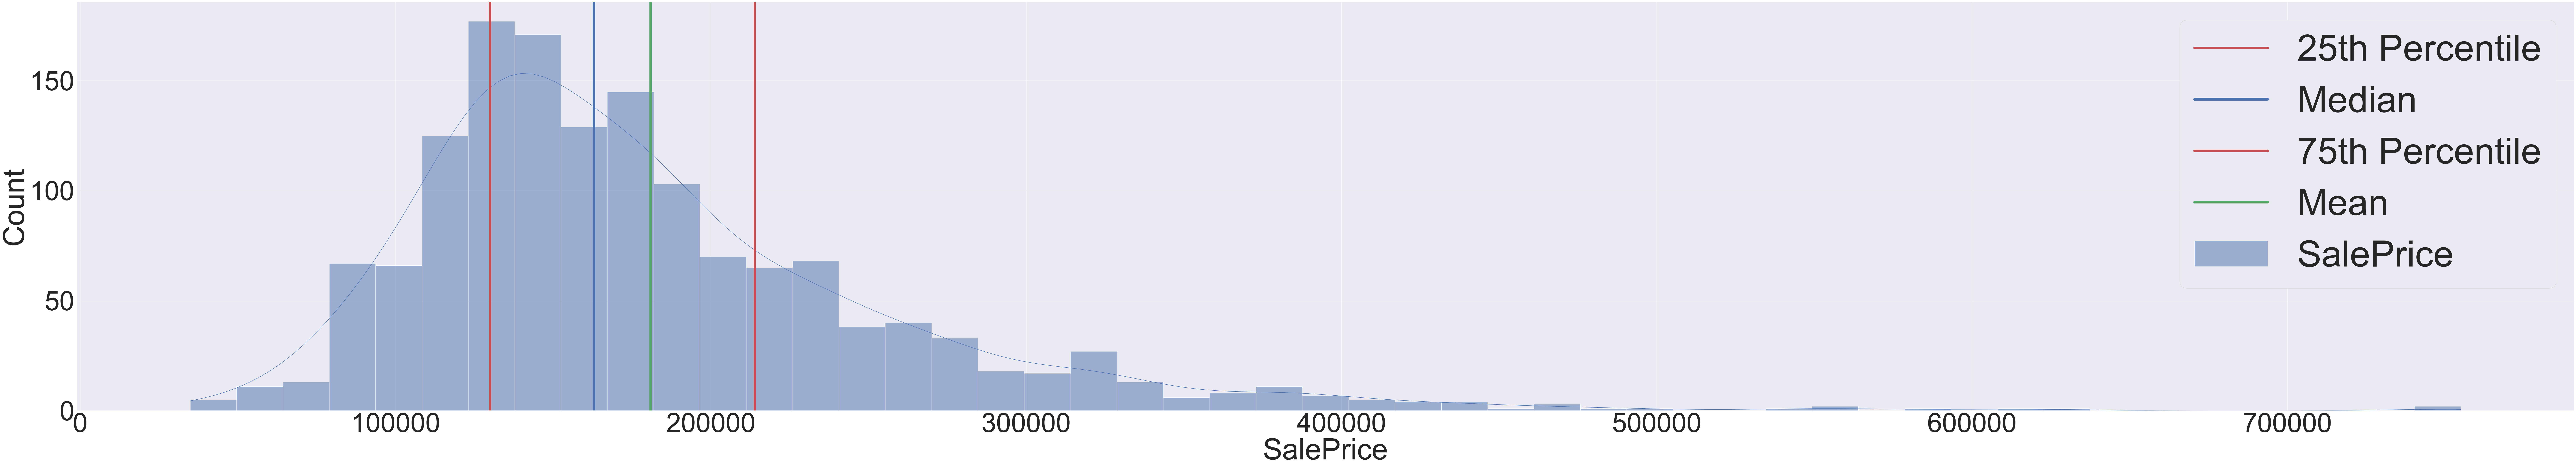

In [48]:
sns.set(rc= {"figure.figsize": (20, 10)},font_scale=10)
sns.displot(data=df, x="SalePrice",kde=True,height=30,aspect=5,label='SalePrice')
quantiles=[25,50,75]
names={25:'25th Percentile',50:'Median',75:'75th Percentile'}
colors=['r','b','r']
for q, c in zip(quantiles, colors):
    plt.axvline(np.percentile(df['SalePrice'],q), 0, 1, color=c, ls='-',lw=10,label=names[q])
plt.axvline(df['SalePrice'].mean(),0, 1, color='g', ls='-',lw=10,label='Mean') 
plt.legend(loc='upper right',fontsize =150)
plt.show()

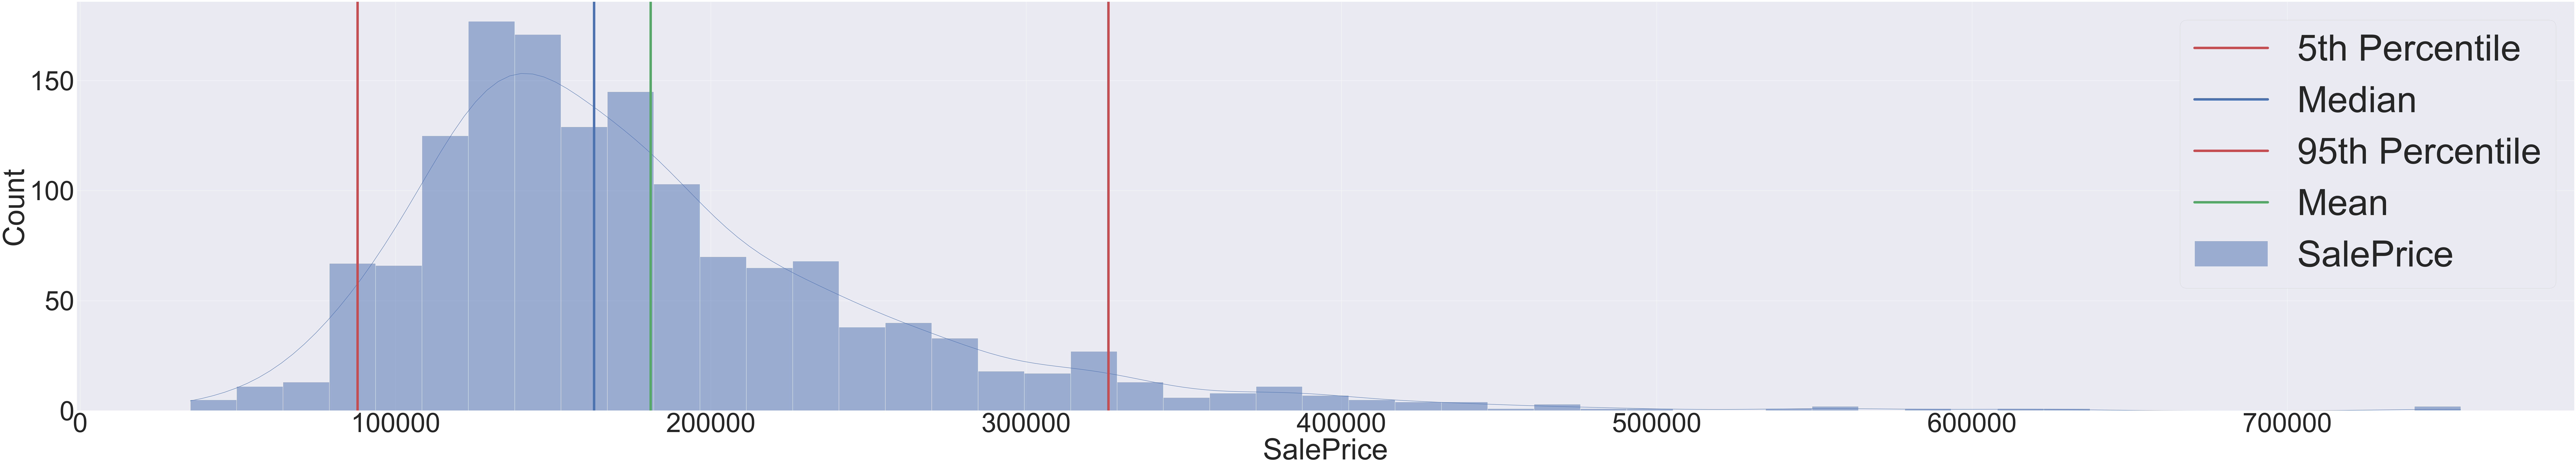

In [49]:
sns.set(rc= {"figure.figsize": (20, 10)},font_scale=10)
sns.displot(data=df, x="SalePrice",kde=True,height=30,aspect=5,label='SalePrice')
quantiles=[5,50,95]
names={5:'5th Percentile',50:'Median',95:'95th Percentile'}
colors=['r','b','r']
for q, c in zip(quantiles, colors):
    plt.axvline(np.percentile(df['SalePrice'],q), 0, 1, color=c, ls='-',lw=10,label=names[q])
plt.axvline(df['SalePrice'].mean(),0, 1, color='g', ls='-',lw=10,label='Mean') 
plt.legend(loc='upper right',fontsize =150)
plt.show()

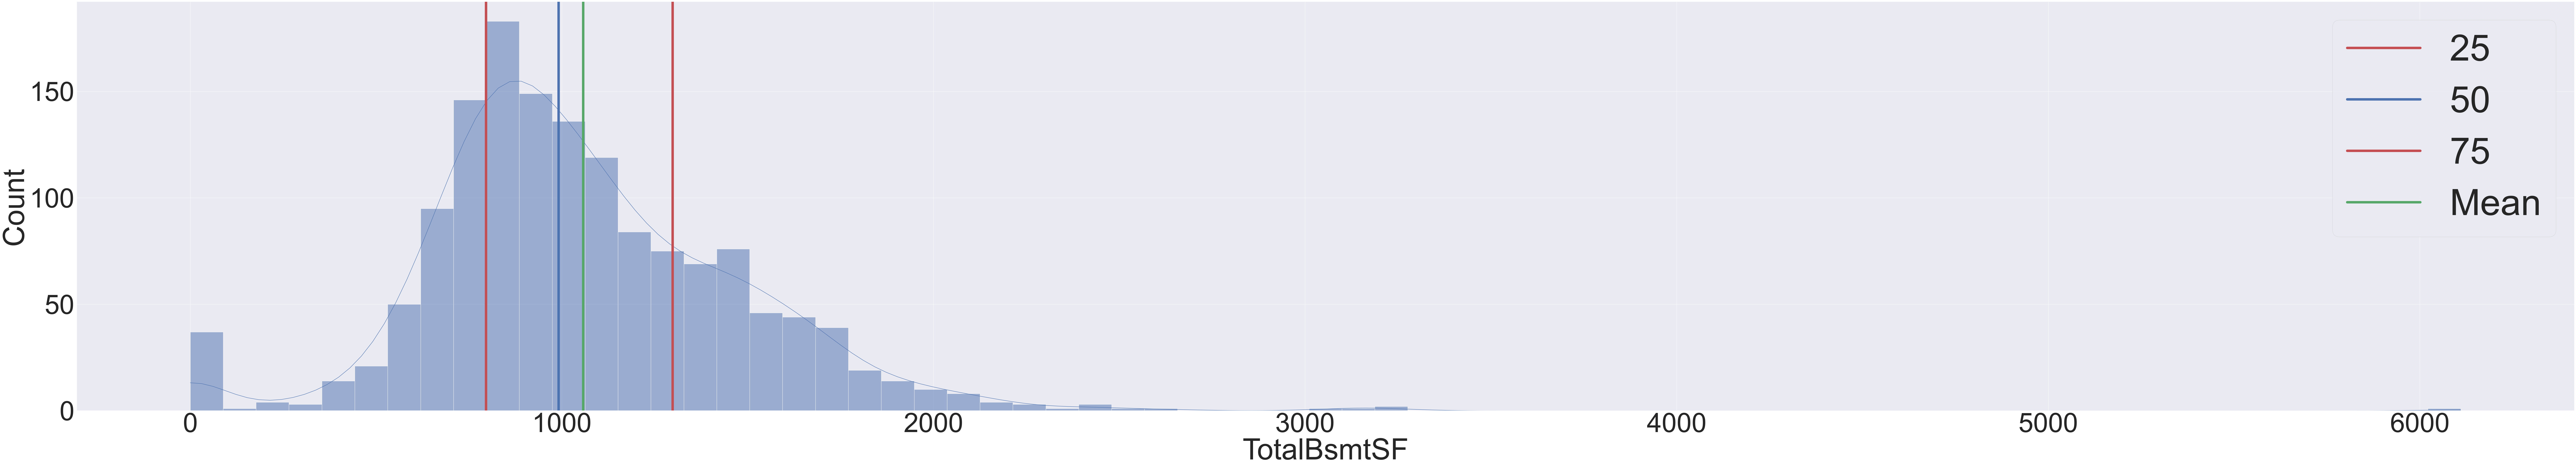

In [50]:
sns.set(rc= {"figure.figsize": (30, 20)},font_scale=10)
sns.displot(data=df, x="TotalBsmtSF",kde=True,height=30,aspect=5)
quantiles=[25,50,75]
colors=['r','b','r']
for q, c in zip(quantiles, colors):
    plt.axvline(np.percentile(df['TotalBsmtSF'],q), 0, 1, color=c, ls='-',lw=10,label=str(q))
plt.axvline(df['TotalBsmtSF'].mean(),0, 1, color='g', ls='-',lw=10,label='Mean') 
plt.legend(loc='upper right',fontsize =150)
plt.show()

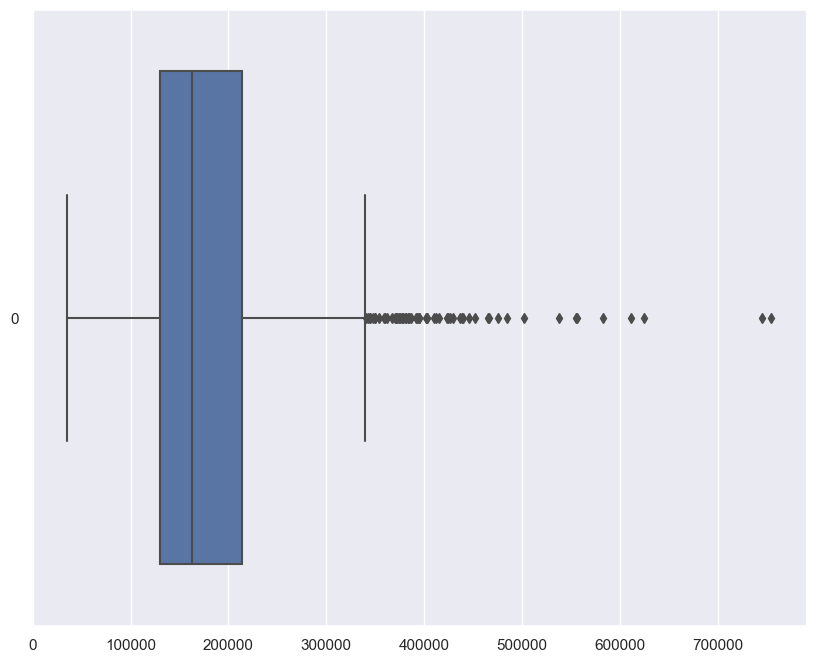

In [51]:
sns.set(rc= {"figure.figsize": (10, 8)})
sns.boxplot(df['SalePrice'],orient='h')
plt.show()

### Bi-variate analysis

1. Compare two variables
2. Calculate Pearson Coefficient
3. Regression and analyse the impact

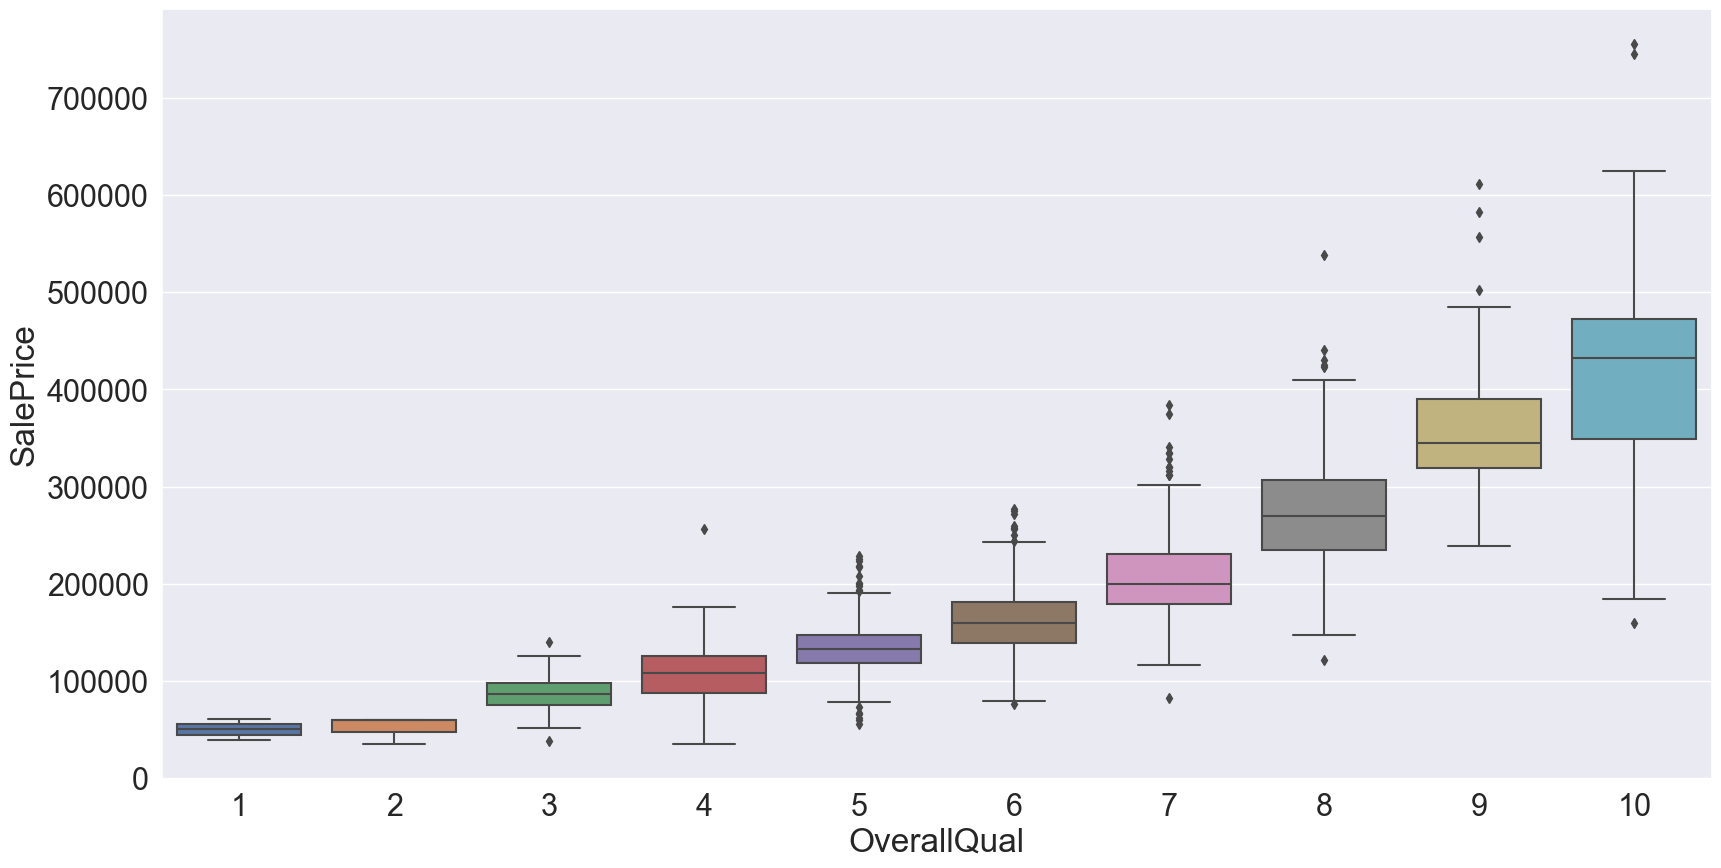

In [52]:
sns.set(rc= {"figure.figsize": (20, 10)},font_scale=2)

sns.boxplot(data=df,y='SalePrice',x='OverallQual')
plt.show()

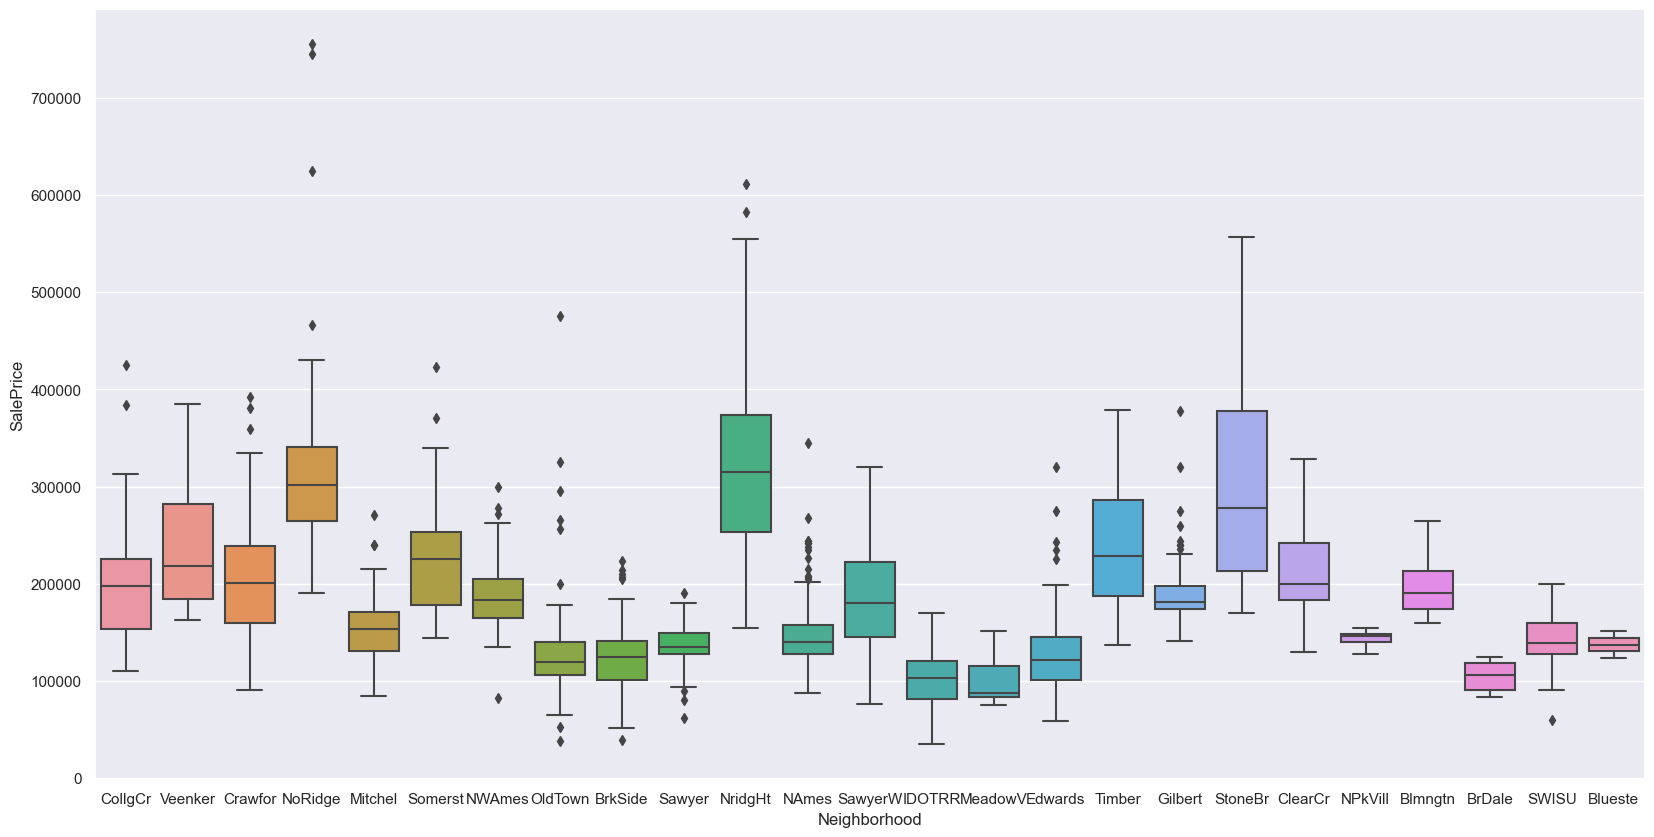

In [53]:
sns.set(rc= {"figure.figsize": (20, 10)},font_scale=1)

sns.boxplot(data=df,y='SalePrice',x='Neighborhood')
plt.show()

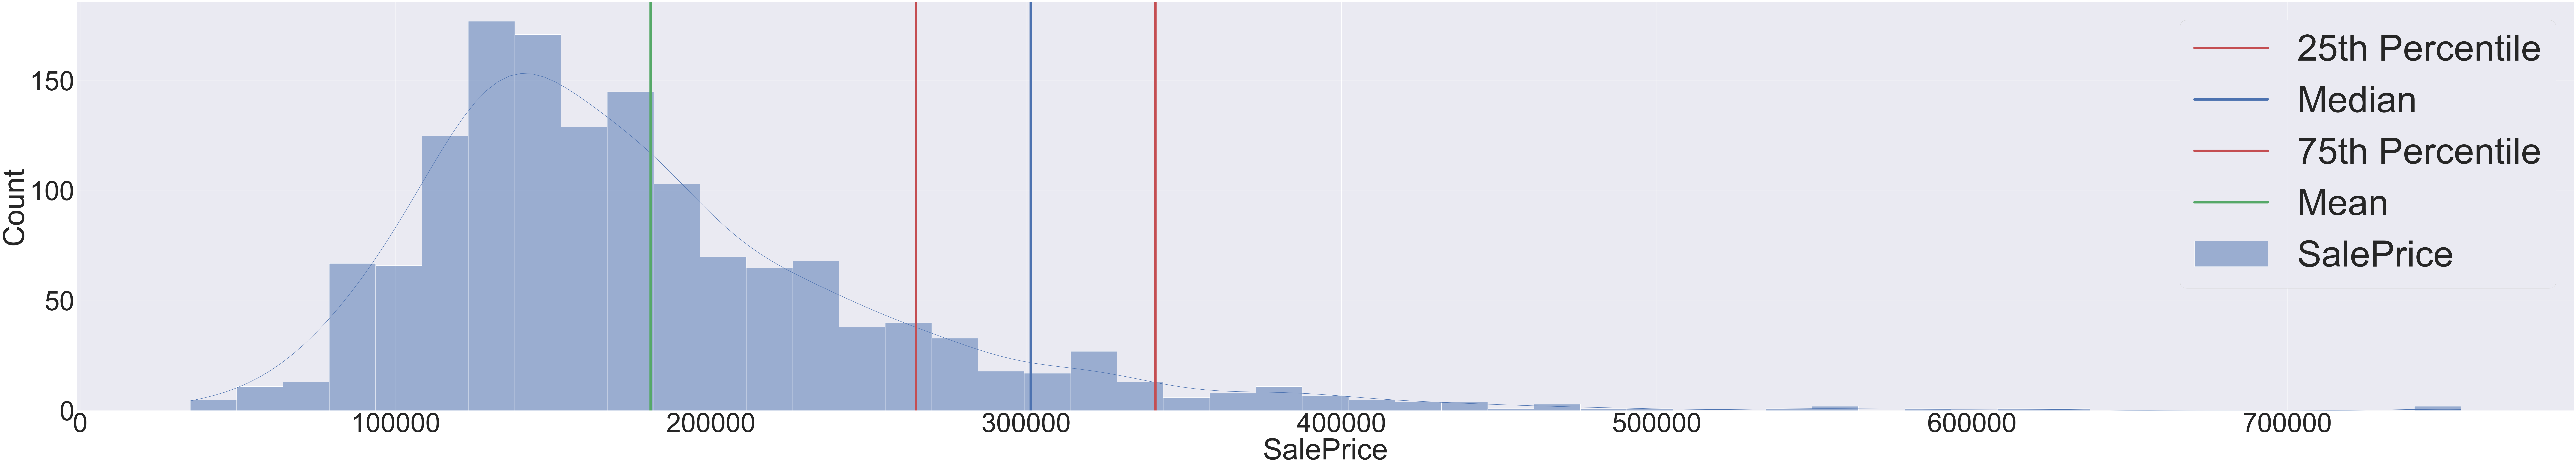

In [54]:
sns.set(rc= {"figure.figsize": (30, 20)},font_scale=10)
sns.displot(data=df, x="SalePrice",kde=True,height=30,aspect=5,label='SalePrice')
quantiles=[25,50,75]
names={25:'25th Percentile',50:'Median',75:'75th Percentile'}
colors=['r','b','r']
df_noridge=df[df.Neighborhood=='NoRidge']
for q, c in zip(quantiles, colors):
    plt.axvline(np.percentile(df_noridge['SalePrice'],q), 0, 1, color=c, ls='-',lw=10,label=names[q])
plt.axvline(df['SalePrice'].mean(),0, 1, color='g', ls='-',lw=10,label='Mean') 
plt.legend(loc='upper right',fontsize =150)
plt.show()

In [55]:
import scipy.stats as stats


# fvalue, pvalue = stats.f_oneway(df['A'], df['B'], df['C'], df['D'])
# print(fvalue, pvalue)
# 17.492810457516338 2.639241146210922e-05

# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols
df2=df[['SalePrice','Neighborhood']].dropna()
df2
# Ordinary Least Squares (OLS) model
model = ols('SalePrice ~ C(Neighborhood)', data=df2).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     71.78
Date:                Mon, 10 Apr 2023   Prob (F-statistic):          1.56e-225
Time:                        09:11:51   Log-Likelihood:                -17968.
No. Observations:                1460   AIC:                         3.599e+04
Df Residuals:                    1435   BIC:                         3.612e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   1.949e+05   1.31e+04     14.879      0.000    1.69e+05    2.21e+05
C(Neighborhood)[T.Blueste] -5.737e+04   4.04e+04     -1.421      0.155   -1.37e+05    2.18e+04
C(Neighborhood)[T.BrDale]  -9.038e+04   1.88e+04     -4.805      0.000   -1.27e+05   -5.35e+04
C(Neighborhood)[T.BrkSide] -7.004e+04   1.49e+04     -4.703      0.000   -9.93e+04   -4.08e+04
C(Neighborhood)[T.ClearCr]  1.769e+04   1.66e+04      1.066      0.287   -1.49e+04    5.03e+04
C(Neighborhood)[T.CollgCr]  3094.8910   1.38e+04      0.224      0.823    -2.4e+04    3.02e+04
C(Neighborhood)[T.Crawfor]  1.575e+04   1.51e+04      1.042      0.298   -1.39e+04    4.54e+04
C(Neighborhood)[T.Edwards] -6.665e+04   1.42e+04     -4.705      0.000   -9.44e+04   -3.89e+04
C(Neighborhood)[T.Gilbert] -2016.3760   1.44e+04     -0.140      0.889   -3.03e+04    2.63e+04
C(Neighborhood)[T.IDOTRR]  -9.475e+04   1.58e+04     -5.988      0.000   -1.26e+05   -6.37e+04
C(Neighborhood)[T.MeadowV] -9.629e+04   1.85e+04     -5.199      0.000   -1.33e+05      -6e+04
C(Neighborhood)[T.Mitchel]  -3.86e+04   1.52e+04     -2.540      0.011   -6.84e+04   -8784.735
C(Neighborhood)[T.NAmes]   -4.902e+04   1.36e+04     -3.609      0.000   -7.57e+04   -2.24e+04
C(Neighborhood)[T.NPkVill] -5.218e+04   2.23e+04     -2.344      0.019   -9.58e+04   -8510.657
C(Neighborhood)[T.NWAmes]  -5820.8139   1.45e+04     -0.400      0.689   -3.43e+04    2.27e+04
C(Neighborhood)[T.NoRidge]  1.404e+05   1.56e+04      9.015      0.000     1.1e+05    1.71e+05
C(Neighborhood)[T.NridgHt]  1.214e+05   1.45e+04      8.390      0.000     9.3e+04     1.5e+05
C(Neighborhood)[T.OldTown] -6.665e+04    1.4e+04     -4.744      0.000   -9.42e+04   -3.91e+04
C(Neighborhood)[T.SWISU]   -5.228e+04    1.7e+04     -3.080      0.002   -8.56e+04    -1.9e+04
C(Neighborhood)[T.Sawyer]  -5.808e+04   1.45e+04     -3.999      0.000   -8.66e+04   -2.96e+04
C(Neighborhood)[T.SawyerW] -8315.0857   1.49e+04     -0.559      0.576   -3.75e+04    2.08e+04
C(Neighborhood)[T.Somerst]  3.051e+04   1.43e+04      2.129      0.033    2393.494    5.86e+04
C(Neighborhood)[T.StoneBr]  1.156e+05    1.7e+04      6.812      0.000    8.23e+04    1.49e+05
C(Neighborhood)[T.Timber]   4.738e+04   1.58e+04      3.007      0.003    1.65e+04    7.83e+04
C(Neighborhood)[T.Veenker]   4.39e+04   2.09e+04      2.101      0.036    2913.679    8.49e+04
==============================================================================
Omnibus:                      618.883   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5526.438
Skew:                           1.737   Prob(JB):                         0.00
Kurtosis:                      11.875   Cond. No.                         48.8
============================

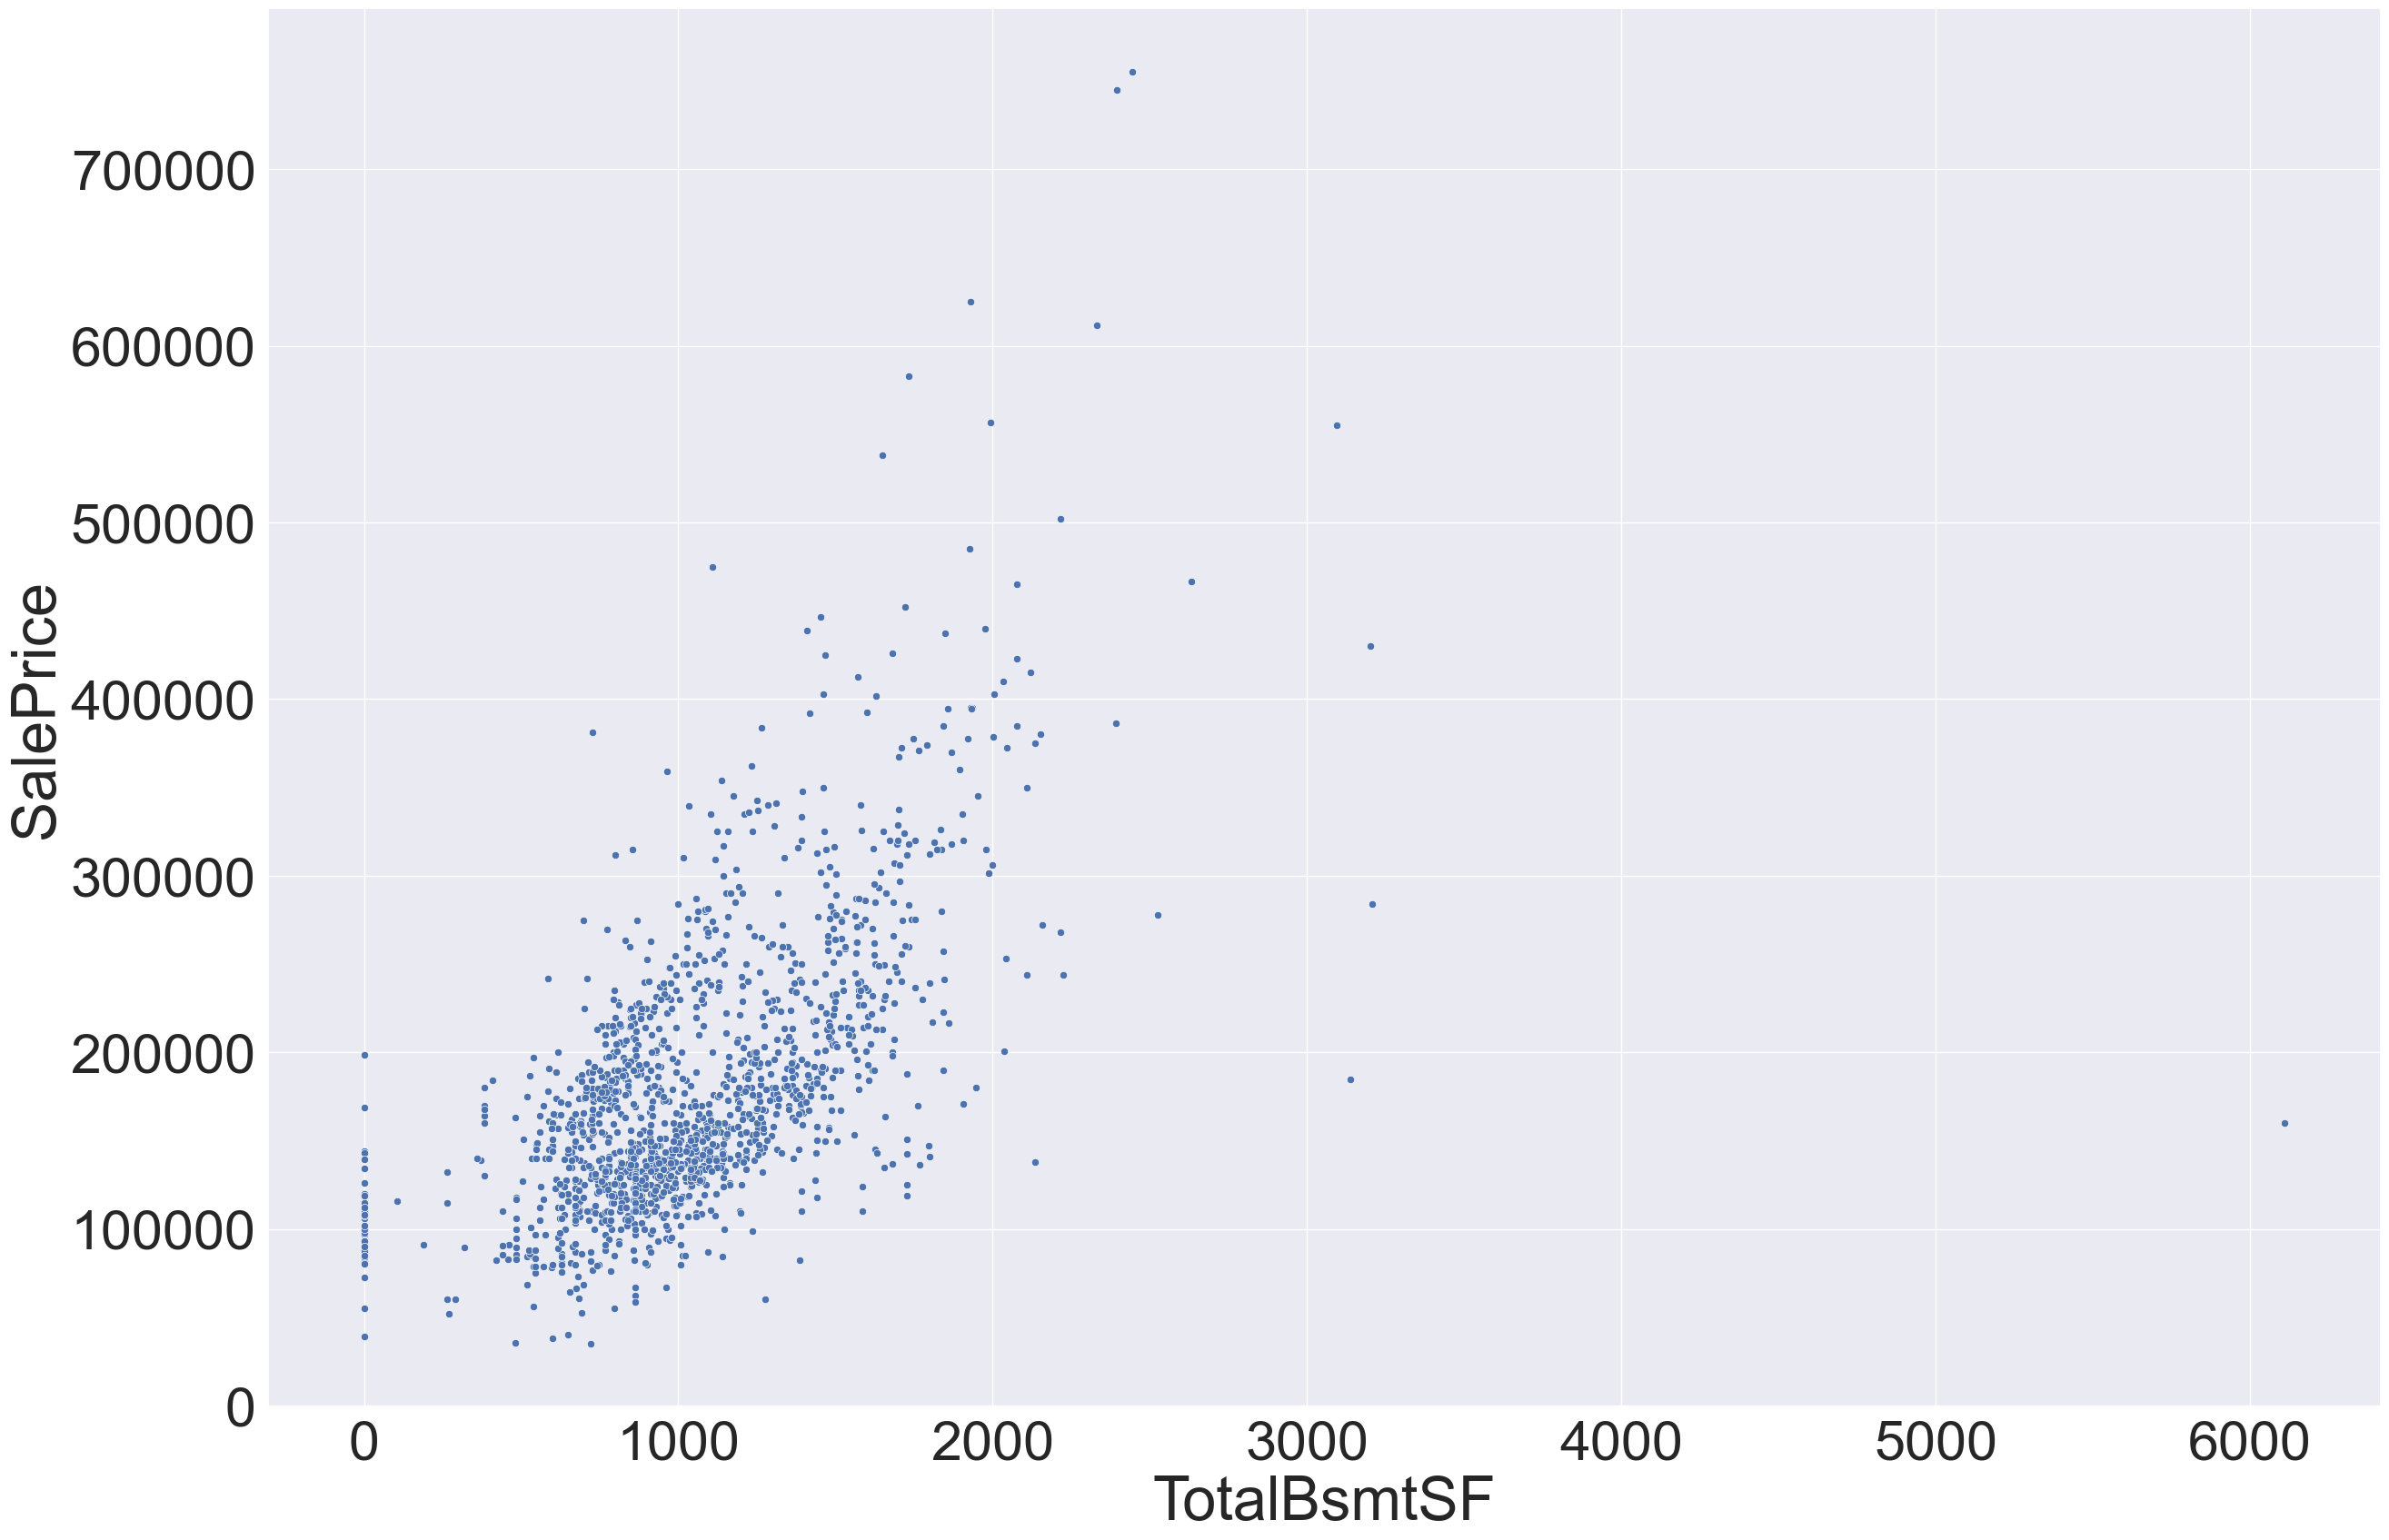

In [56]:
sns.set(rc= {"figure.figsize": (30, 20)},font_scale=4)

sns.scatterplot(data=df,x='TotalBsmtSF',y='SalePrice')
plt.show()

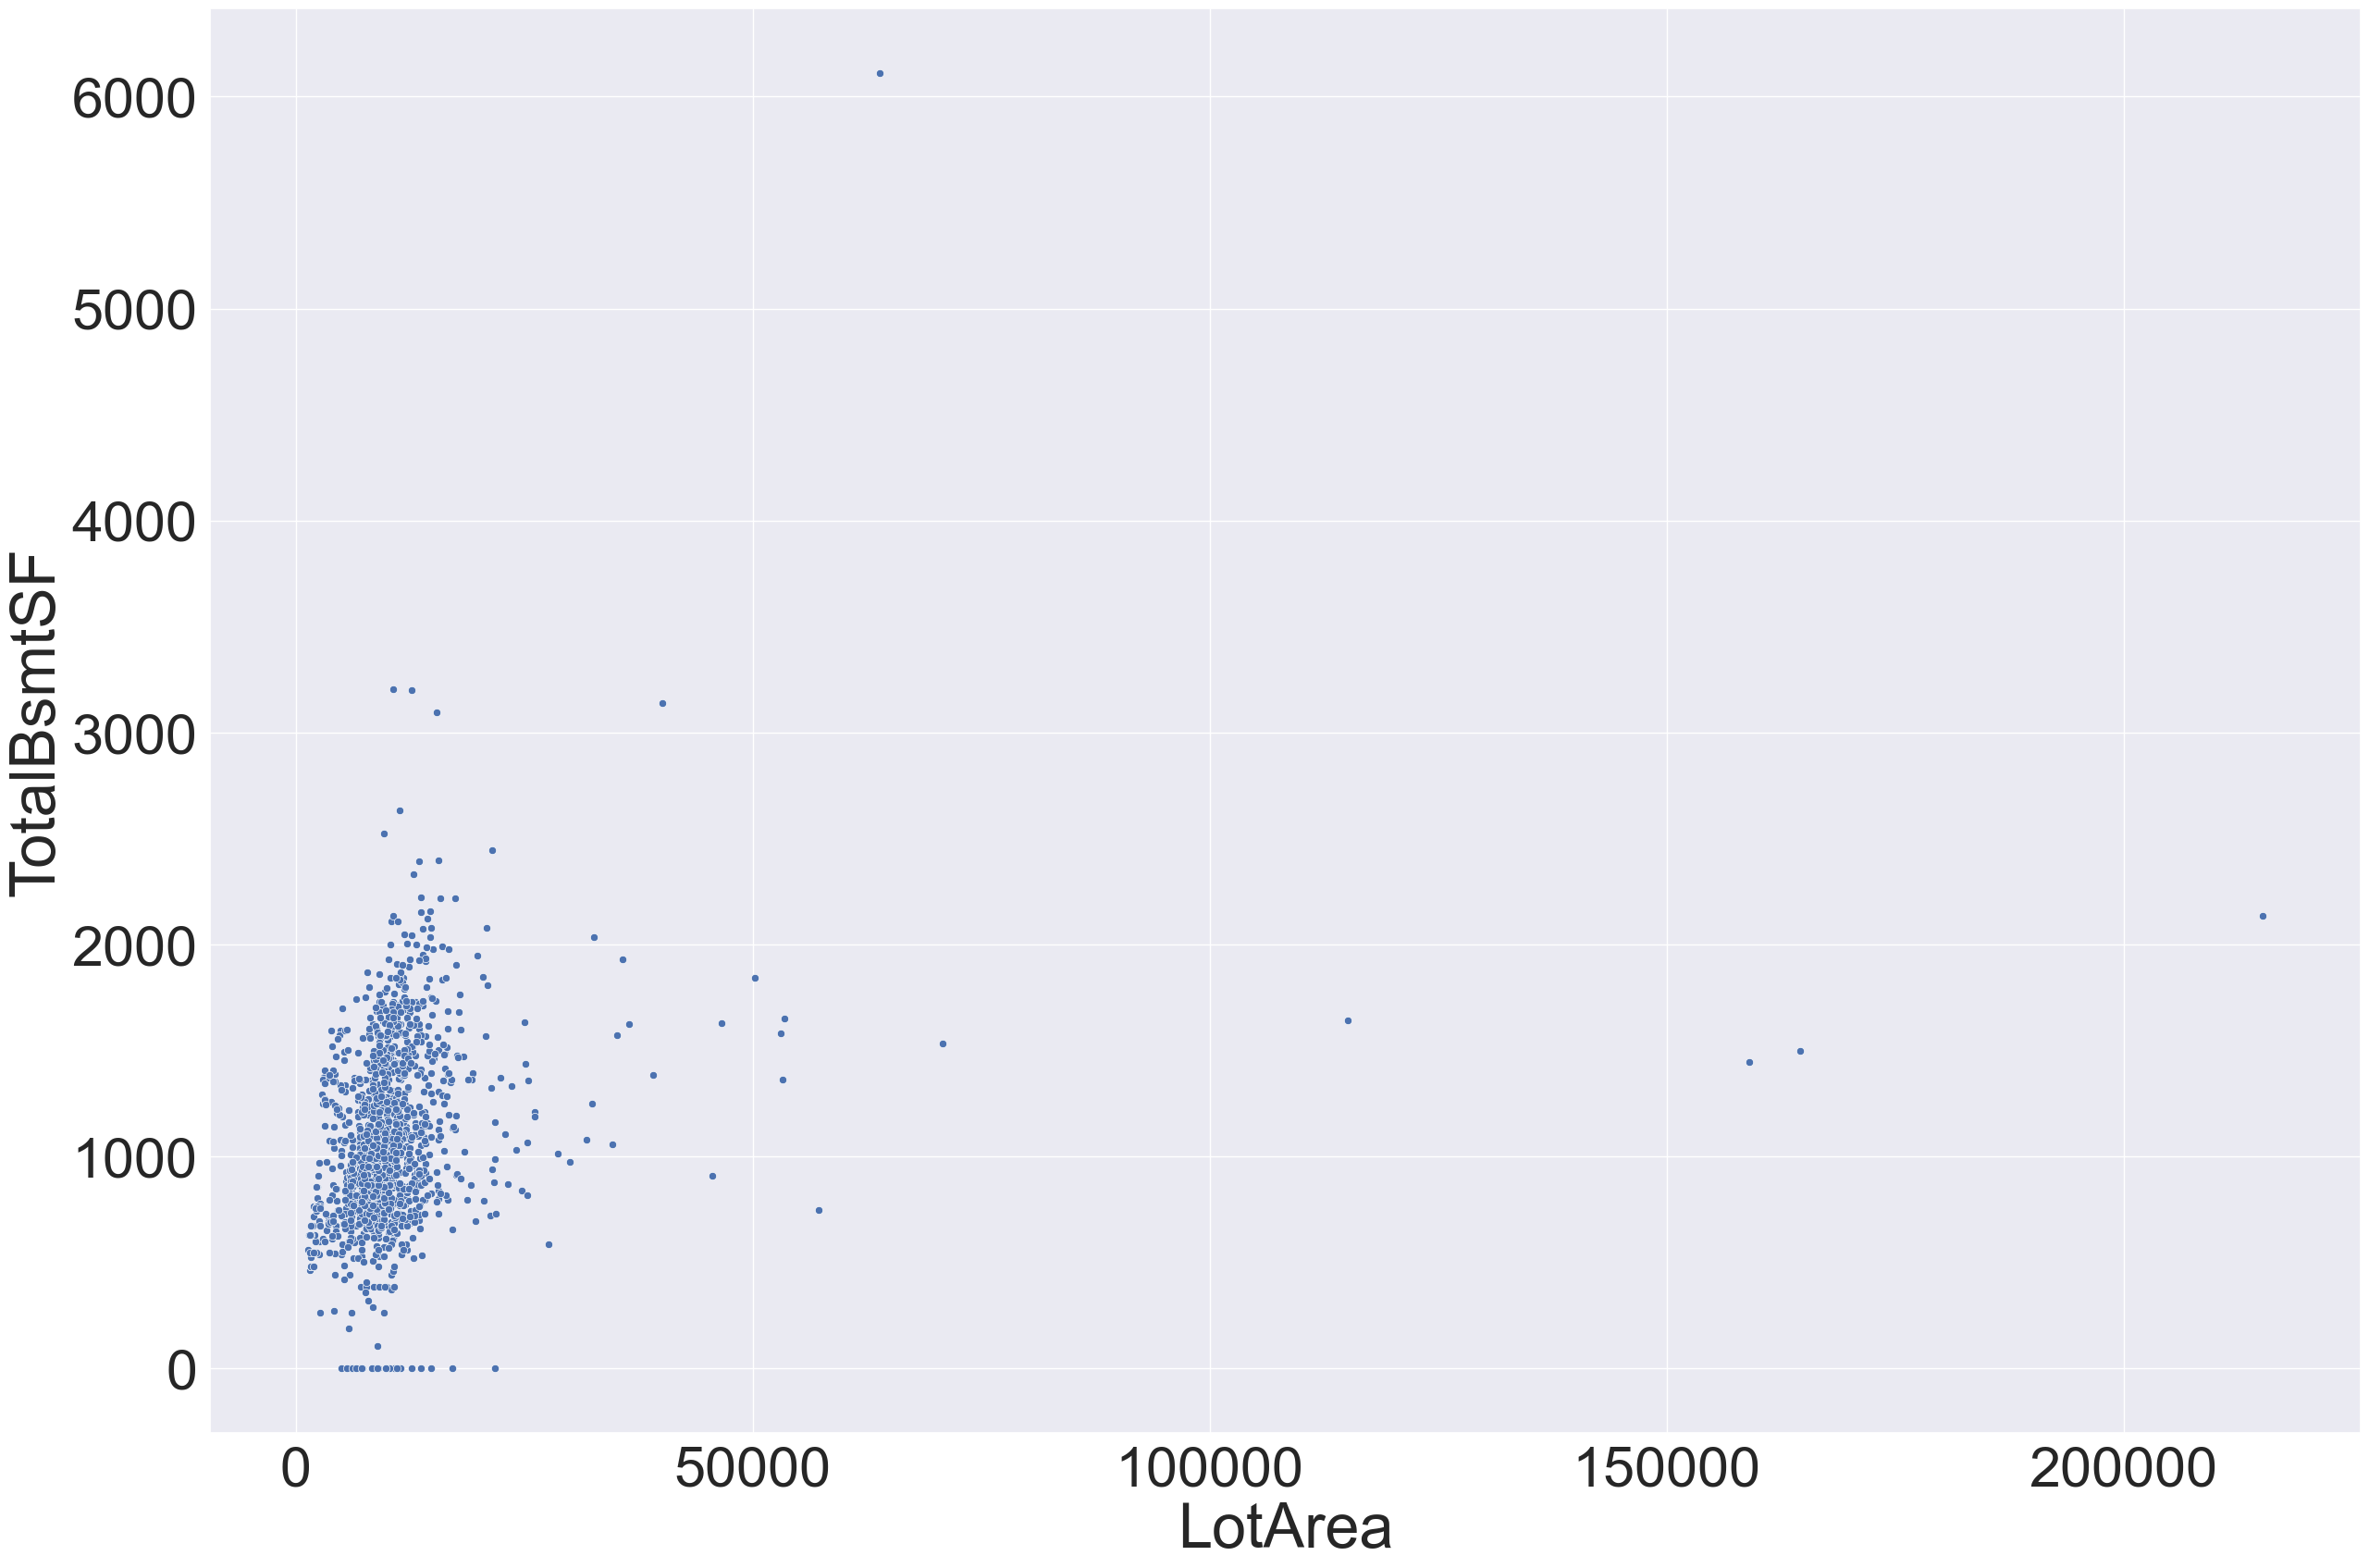

In [57]:
sns.scatterplot(data=df,y='TotalBsmtSF',x='LotArea')
plt.show()

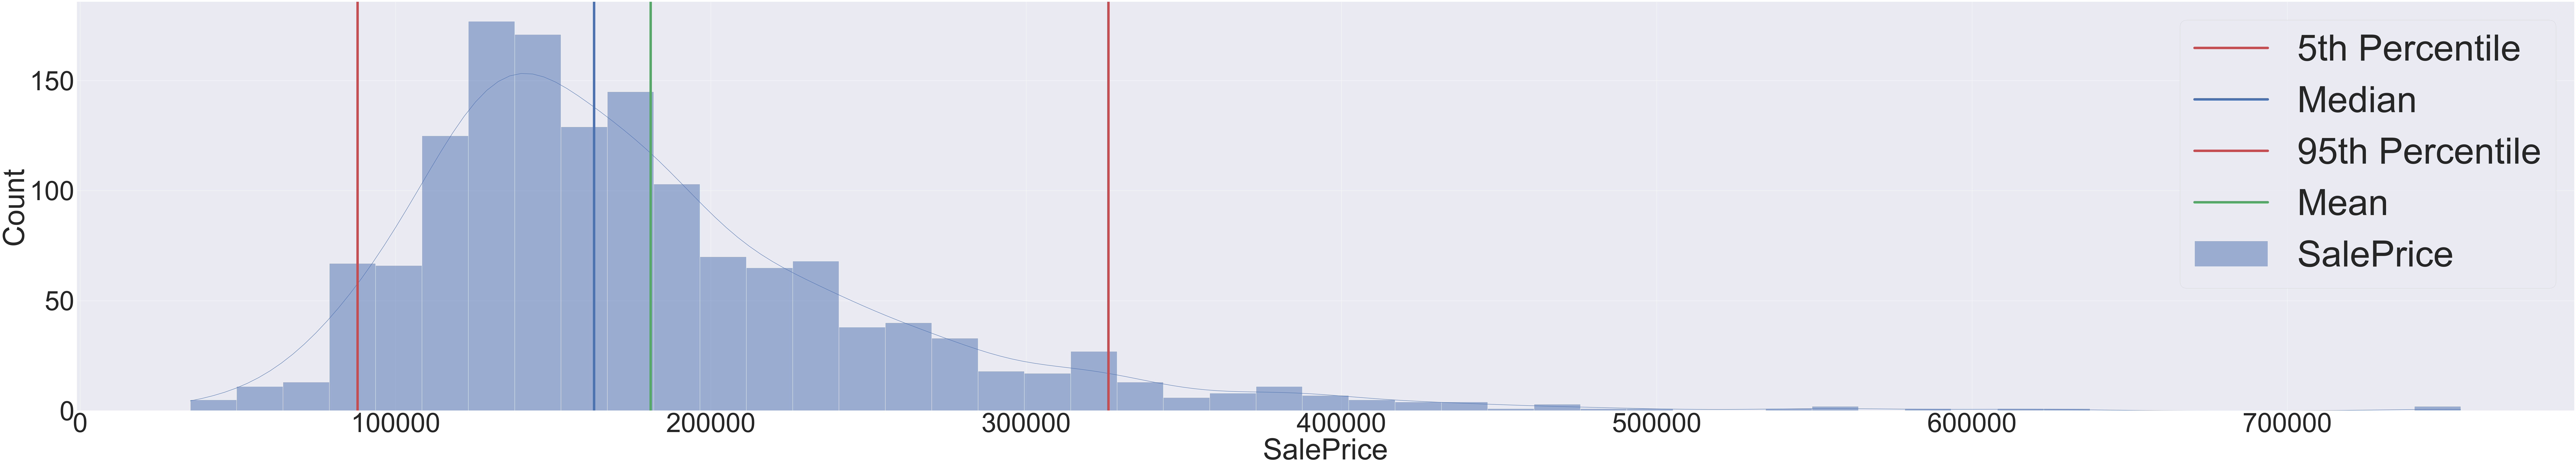

In [58]:
sns.set(rc= {"figure.figsize": (20, 10)},font_scale=10)
sns.displot(data=df, x="SalePrice",kde=True,height=30,aspect=5,label='SalePrice')
quantiles=[5,50,95]
names={5:'5th Percentile',50:'Median',95:'95th Percentile'}
colors=['r','b','r']
for q, c in zip(quantiles, colors):
    plt.axvline(np.percentile(df['SalePrice'],q), 0, 1, color=c, ls='-',lw=10,label=names[q])
plt.axvline(df['SalePrice'].mean(),0, 1, color='g', ls='-',lw=10,label='Mean') 
plt.legend(loc='upper right',fontsize =150)
plt.show()

### Hypothesis Test slide Example

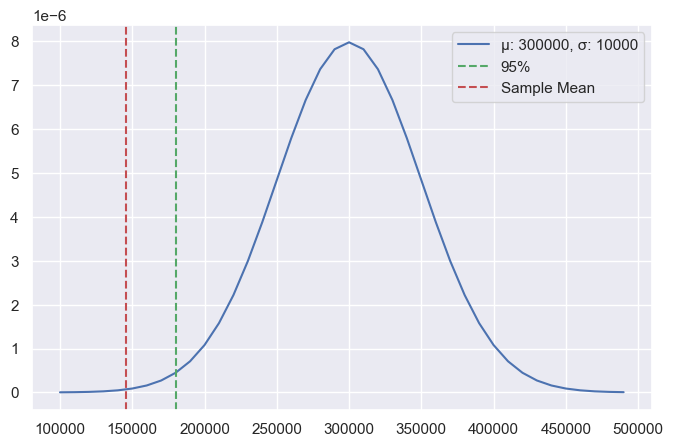

In [59]:
import scipy as sc

sc.stats.skew(df['SalePrice'])
sns.set(rc= {"figure.figsize": (20, 10)},font_scale=1)

NothAmes=df[df.Neighborhood=="NAmes"]
sample_mean=NothAmes['SalePrice'].mean()
sample_sd=NothAmes['SalePrice'].std()
pop_mean=300000
sc.stats.ttest_1samp(a=NothAmes['SalePrice'], popmean=pop_mean)

sample_sd

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
plt.rcParams["figure.figsize"] = (8,5)

#x-axis ranges from -5 and 5 with .001 steps
x = np.arange(100000, 500000, 10000)

#define multiple normal distributions
plt.plot(x, norm.pdf(x, 300000, 50000), label='μ: 300000, σ: 10000')
# plt.plot(x, norm.pdf(x, 0, 1.5), label='μ:0, σ: 1.5')
# plt.plot(x, norm.pdf(x, 0, 2), label='μ:0, σ: 2')
plt.axvline(180000, 0, 1, color='g', ls='--',label='95%')  
plt.axvline(145847, 0, 1, color='r', ls='--',label='Sample Mean')    

#add legend to plot
plt.legend()
plt.show()

In [60]:
# df=pd.read_csv("house-prices-advanced-regression-techniques/train.csv") #Regression

# df2=df.select_dtypes(include=np.number).drop("Id",axis=1)
# sns.pairplot(df2)
# plt.show()

### Categorical Target

In [61]:
iris_df = sns.load_dataset("iris")
iris_df.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [62]:
iris_df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

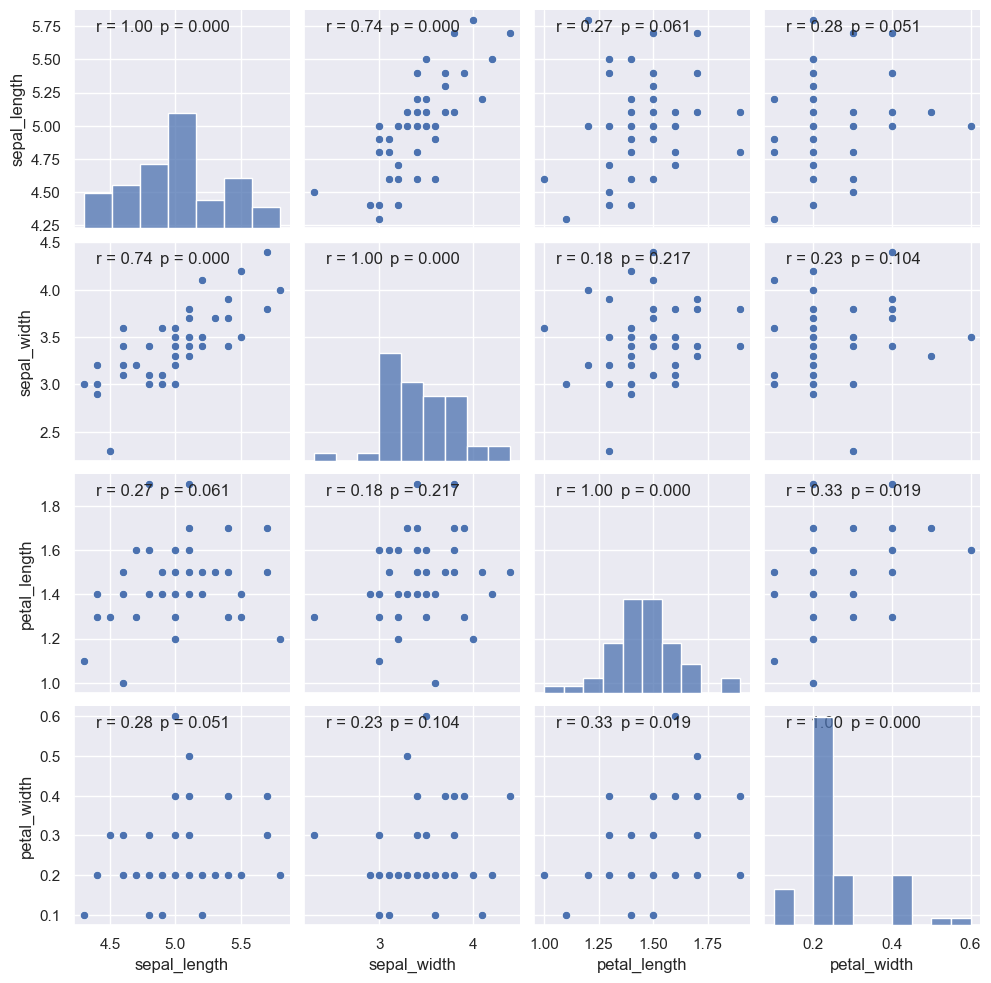

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

def corrfunc(x, y, **kws):
    (r, p) = pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f} ".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)
    ax.annotate("p = {:.3f}".format(p),
                xy=(.4, .9), xycoords=ax.transAxes)


iris_df2 = iris_df[iris_df["species"] == "setosa"]
graph = sns.pairplot(iris_df2)
graph.map(corrfunc)
plt.show()

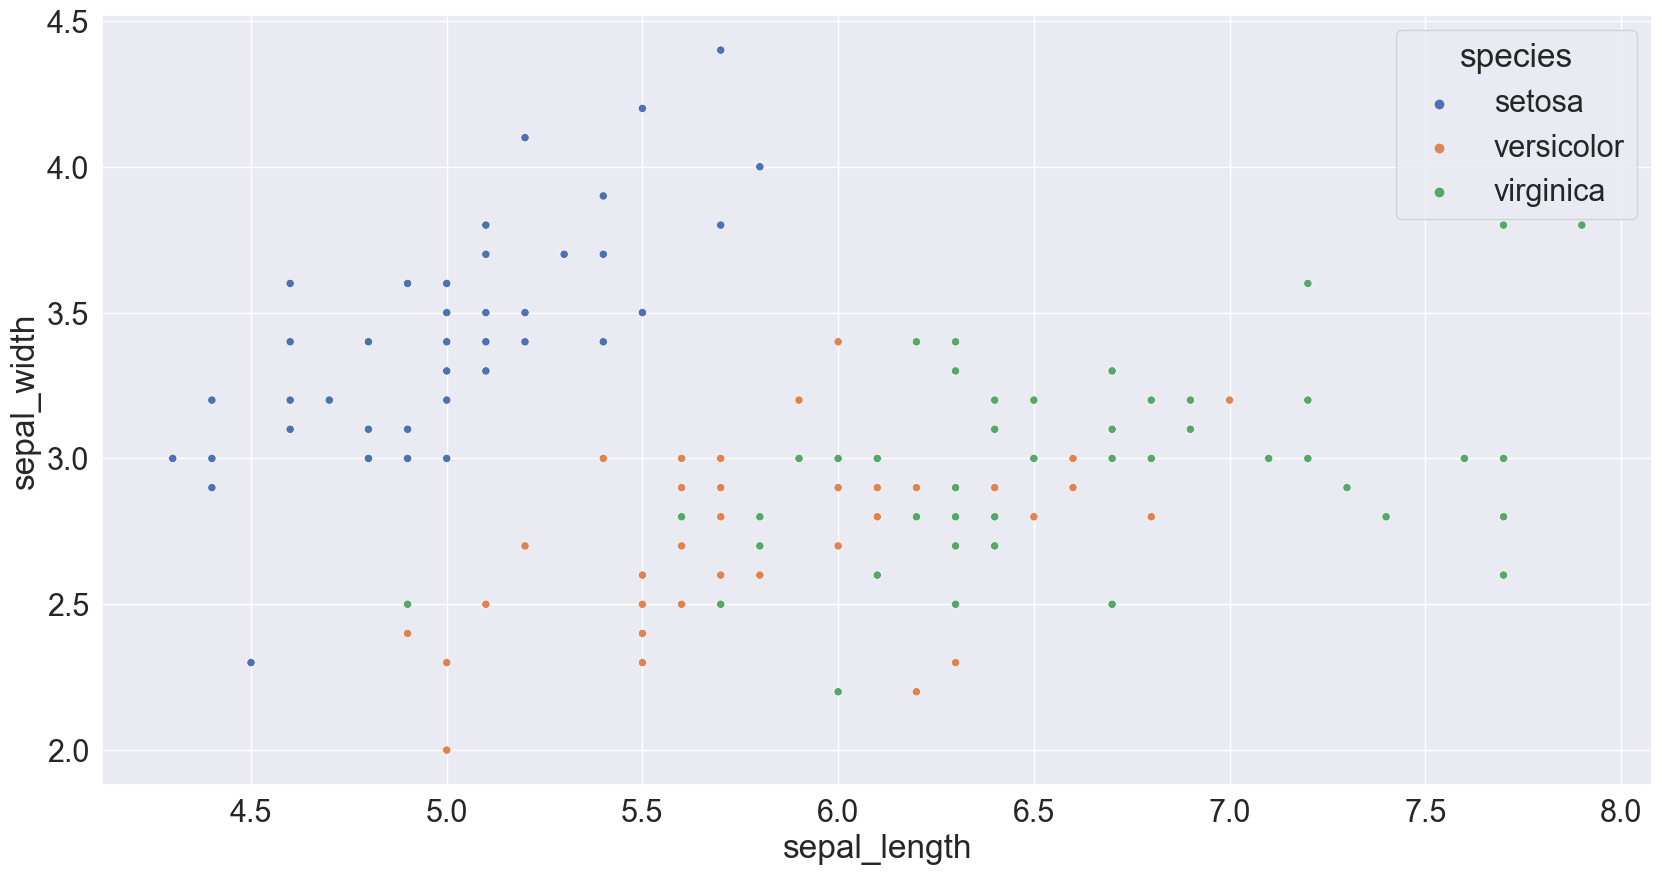

In [64]:
sns.set(rc= {"figure.figsize": (20, 10)},font_scale=2)

sns.scatterplot(data=iris_df,x='sepal_length',y='sepal_width',hue='species')
plt.show()

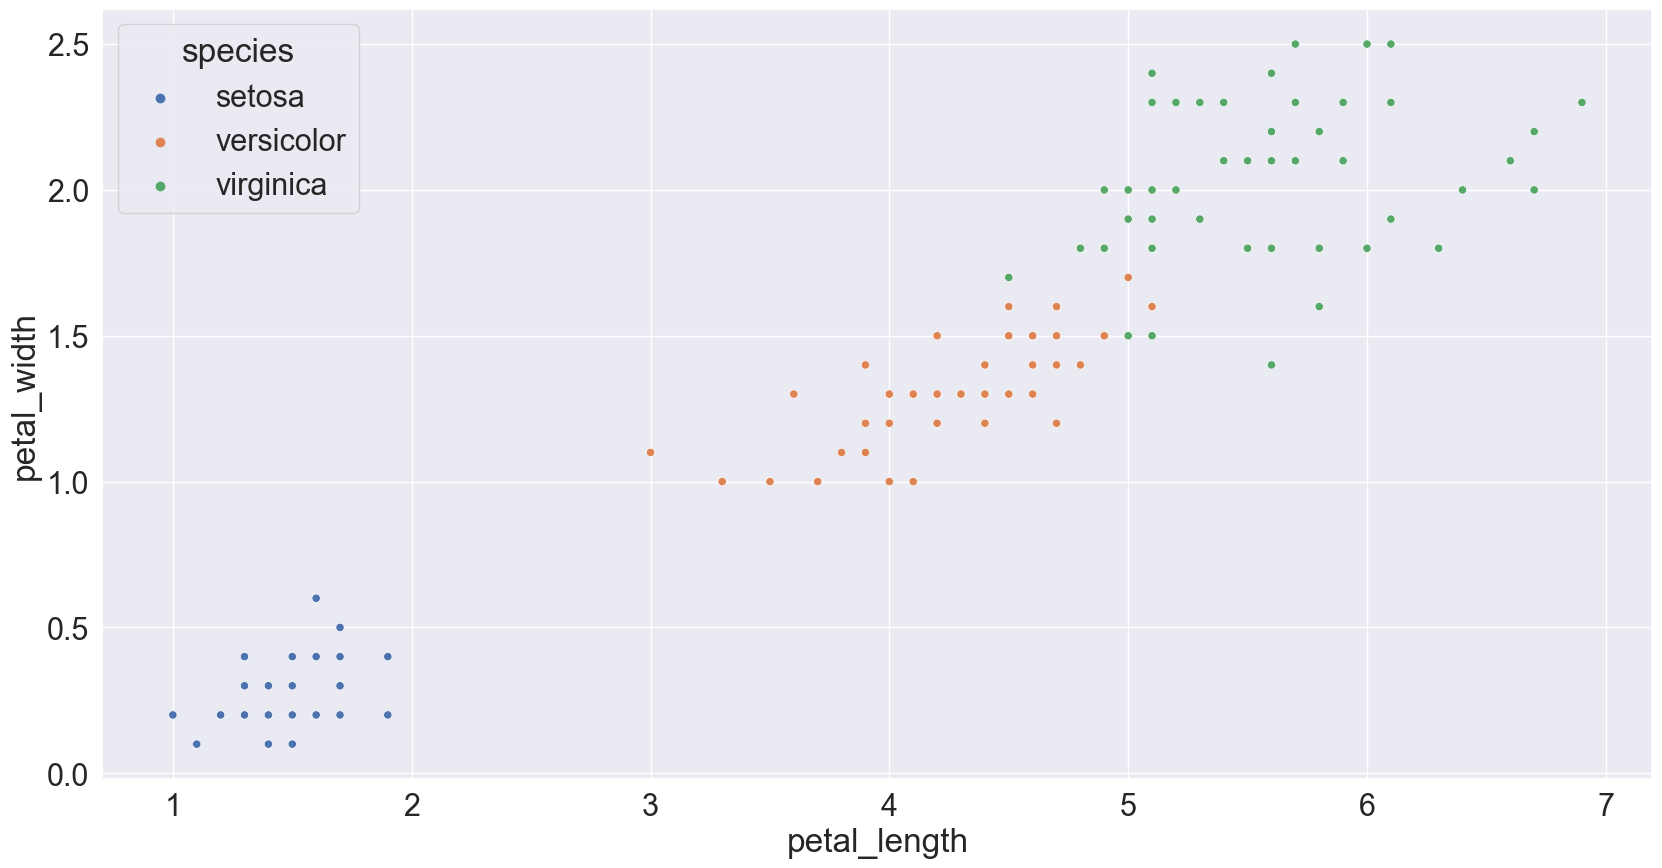

In [65]:
sns.set(rc= {"figure.figsize": (20, 10)},font_scale=2)

sns.scatterplot(data=iris_df,x='petal_length',y='petal_width',hue='species')
plt.show()

    Time series - Number of time periods
    Stationarity
    Seasonality
    Auto Correlation

In [66]:
#Simple Linear Regression

In [67]:
stores_agg=stores.groupby("date")['sales'].sum().reset_index()


### Outlier Detection




### Univariate outliers

### Interquartile Range as indicator
### Treatment is removal of the outlier
### Histogram of Sale Price with and without outliers in the data


Old Shape:  (1460, 81)
340075.0 3875.0
New Shape:  (1399, 81)


C:\Users\ankommar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:36: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

C:\Users\ankommar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



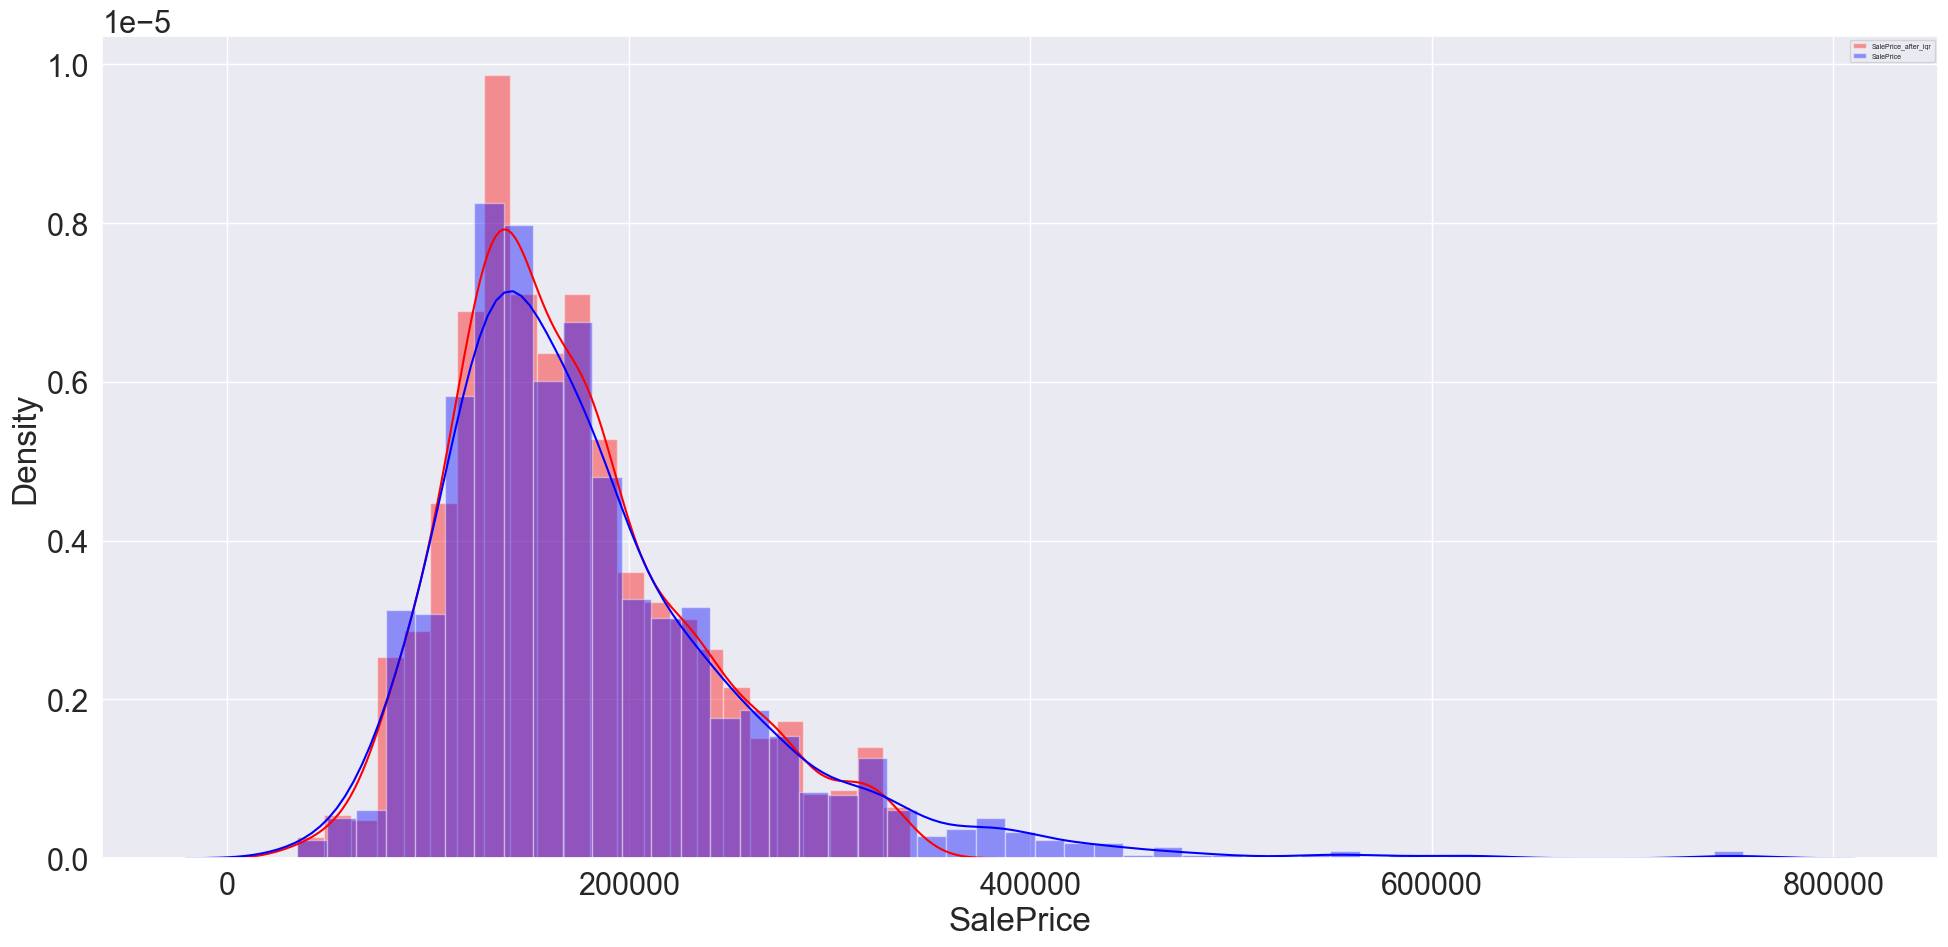

In [68]:
#IQR


def iqr(df_iqr,nam):
    Q1 = np.percentile(df_iqr[nam], 25,
                       interpolation = 'midpoint')

    Q3 = np.percentile(df_iqr[nam], 75,
                       interpolation = 'midpoint')
    IQR = Q3 - Q1

    print("Old Shape: ", df_iqr.shape)

    # Upper bound
    upper=Q3+1.5*IQR
    upper_array=np.array(df_iqr[nam]>=upper)
    # Lower bound
    lower=Q1-1.5*IQR
    lower_array=np.array(df_iqr[nam]<=lower)

    print(upper, lower)
    # Removing the outliers
    upper_array
    df_iqr=df_iqr.drop(df_iqr[df_iqr[nam]>=upper].index)
    df_iqr=df_iqr.drop(df_iqr[df_iqr[nam]<=lower].index)

    # df.drop(lower_array[0],inplace=True)

    print("New Shape: ", df_iqr.shape)
    return df_iqr

def plot_hist_outlier(df, nam):
    df_iqr=iqr(df,nam)
    #     plt.rcParams["figure.figsize"] = (40,40)
    plt.figure()
    sns.distplot(a=df_iqr[nam],hist=True,label=nam+"_after_iqr",color='red')
    sns.distplot(a=df[nam],label=nam,color='blue')
    plt.tight_layout()
    #     quantiles=[25,50,75]
    #     colors=['r','b','r']
    #     for q, c in zip(quantiles, colors):
    #         plt.axvline(np.percentile(df_iqr[nam],q), 0, 1, color=c, ls='-',lw=10,label=str(q))
    #     plt.axvline(df_iqr[nam].mean(),0, 1, color='g', ls='-',lw=10,label='Mean') 
    plt.legend(loc='upper right',fontsize =5)
    plt.show()
plot_hist_outlier(df,'SalePrice')

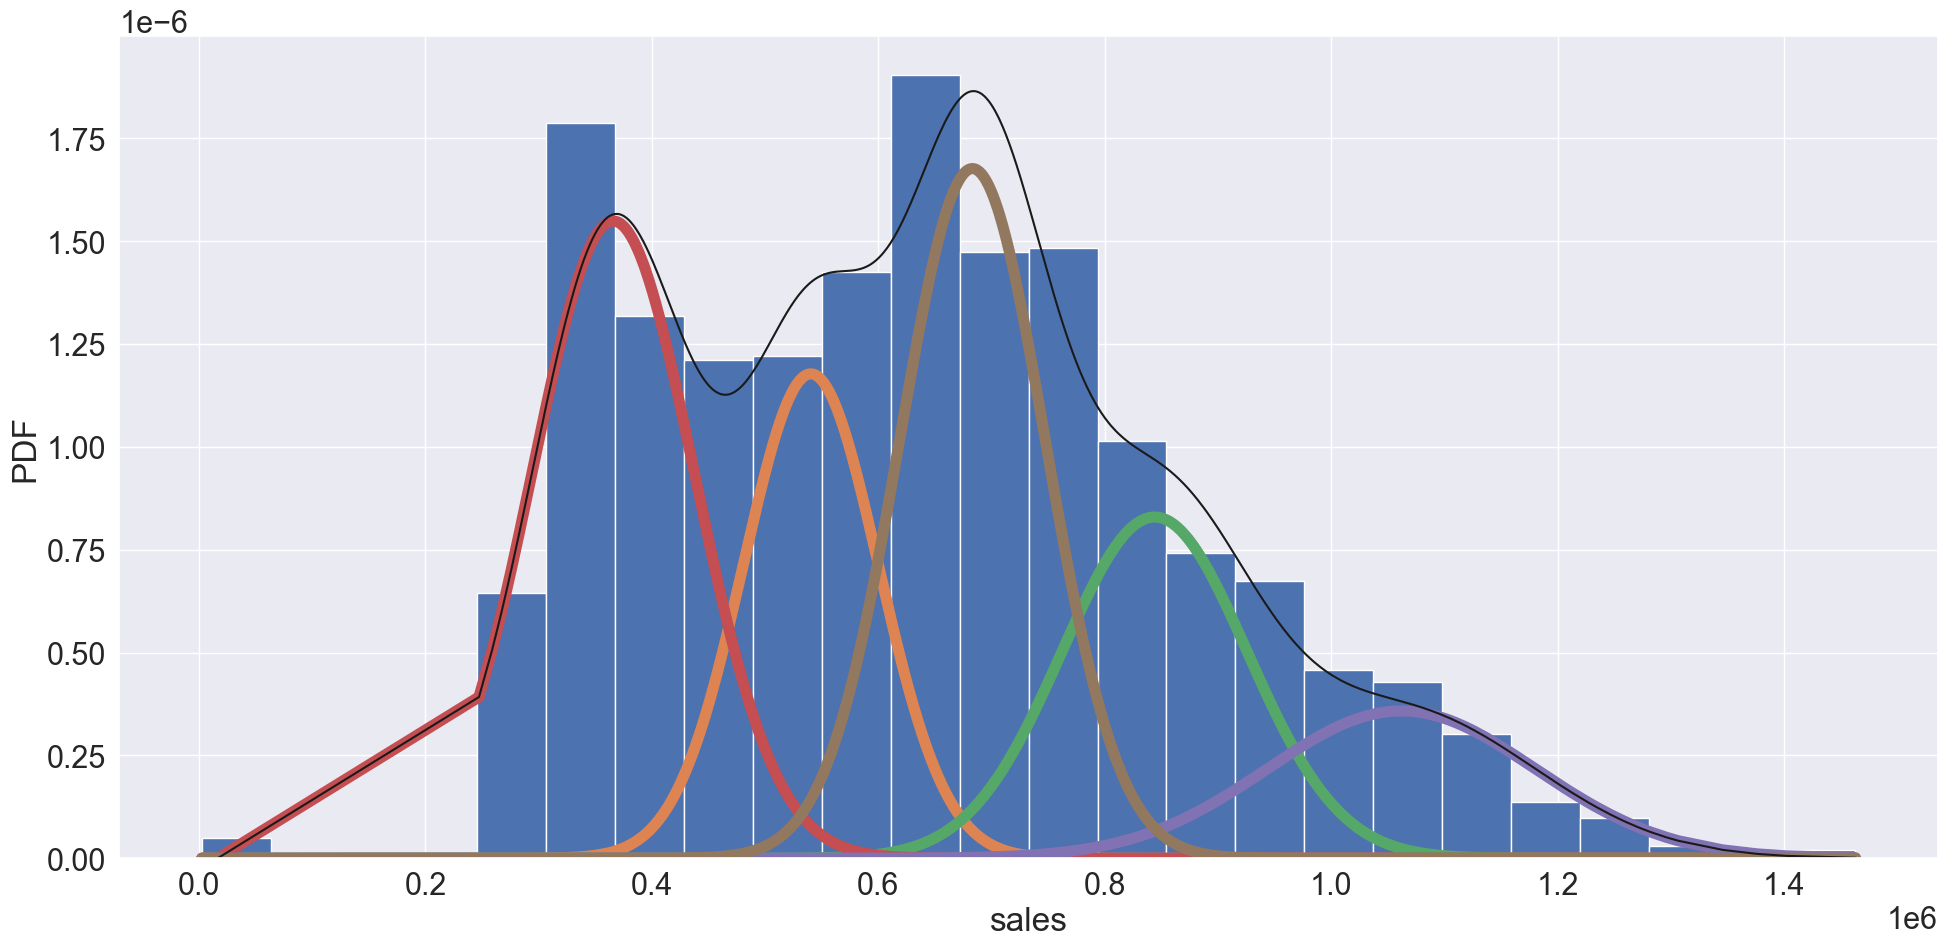

In [69]:
#Gaussian Mixture Models
def GMM(df,nam):
    import pandas as pd
    from sklearn.mixture import GaussianMixture
    import scipy.stats as stats
    import matplotlib.pyplot as plt
    h=df[nam].to_numpy()
    hp=h.reshape(-1, 1)
    gmm = GaussianMixture(n_components = 5).fit(hp)
    plt.figure()
    plt.hist(hp, bins=24,  density=True)
#     plt.xlim(0, 360)
    f_axis = hp.copy().ravel()
    f_axis.sort()
    a = []
    for weight, mean, covar in zip(gmm.weights_, gmm.means_, gmm.covariances_):
        a.append(weight*norm.pdf(f_axis, mean, np.sqrt(covar)).ravel())
        plt.plot(f_axis, a[-1],linewidth=8)
    plt.plot(f_axis, np.array(a).sum(axis =0), 'k-')
    plt.xlabel(nam)
    plt.ylabel('PDF')
    plt.tight_layout()
    plt.show()

GMM(stores_agg,'sales')

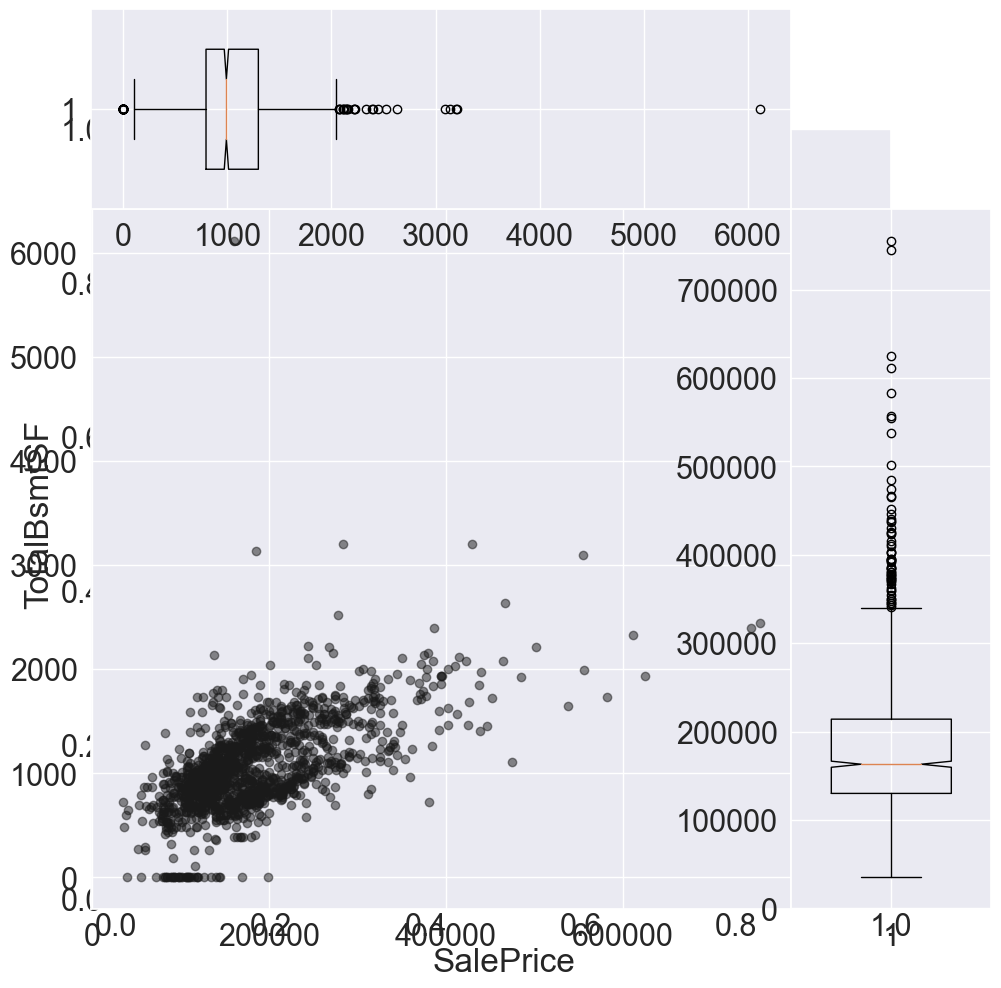

In [70]:
from pandas import read_csv
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
left = 0.1
bottom = 0.1
top = 0.8
right = 0.8
fig = plt.figure(figsize=(10, 10))
plt.xlabel("SalePrice")
plt.ylabel("TotalBsmtSF")
main_ax = plt.axes([left,bottom,right-left,top-bottom])
top_ax = plt.axes([left,top,right - left,1-top])
# plt.axis('off')
right_ax = plt.axes([right,bottom,1-right,top-bottom])
# plt.axis('off')
main_ax.plot(df['SalePrice'],  df['TotalBsmtSF'], 'ko', alpha=0.5)
right_ax.boxplot(df['SalePrice'], notch=True, widths=.6)
top_ax.boxplot(df['TotalBsmtSF'], vert=False, notch=True, widths=.6)

plt.show()


In [71]:
df2=df[['SalePrice','TotalBsmtSF']]
df2.to_numpy()

array([[208500,    856],
       [181500,   1262],
       [223500,    920],
       ...,
       [266500,   1152],
       [142125,   1078],
       [147500,   1256]], dtype=int64)

In [72]:


from pyod.models.knn import KNN
print(sys.path)

['..\\pyod', '..\\pyod', 'C:\\Users\\ankommar\\OneDrive - Microsoft\\Work\\CSA\\IntroDS_Workshop\\tutorial', 'C:\\Users\\ankommar\\AppData\\Local\\Continuum\\anaconda3\\python37.zip', 'C:\\Users\\ankommar\\AppData\\Local\\Continuum\\anaconda3\\DLLs', 'C:\\Users\\ankommar\\AppData\\Local\\Continuum\\anaconda3\\lib', 'C:\\Users\\ankommar\\AppData\\Local\\Continuum\\anaconda3', '', 'C:\\Users\\ankommar\\AppData\\Roaming\\Python\\Python37\\site-packages', 'C:\\Users\\ankommar\\AppData\\Roaming\\Python\\Python37\\site-packages\\win32', 'C:\\Users\\ankommar\\AppData\\Roaming\\Python\\Python37\\site-packages\\win32\\lib', 'C:\\Users\\ankommar\\AppData\\Roaming\\Python\\Python37\\site-packages\\Pythonwin', 'C:\\Users\\ankommar\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages', 'C:\\Users\\ankommar\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\win32', 'C:\\Users\\ankommar\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\ankommar\\AppData\

C:\Users\ankommar\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


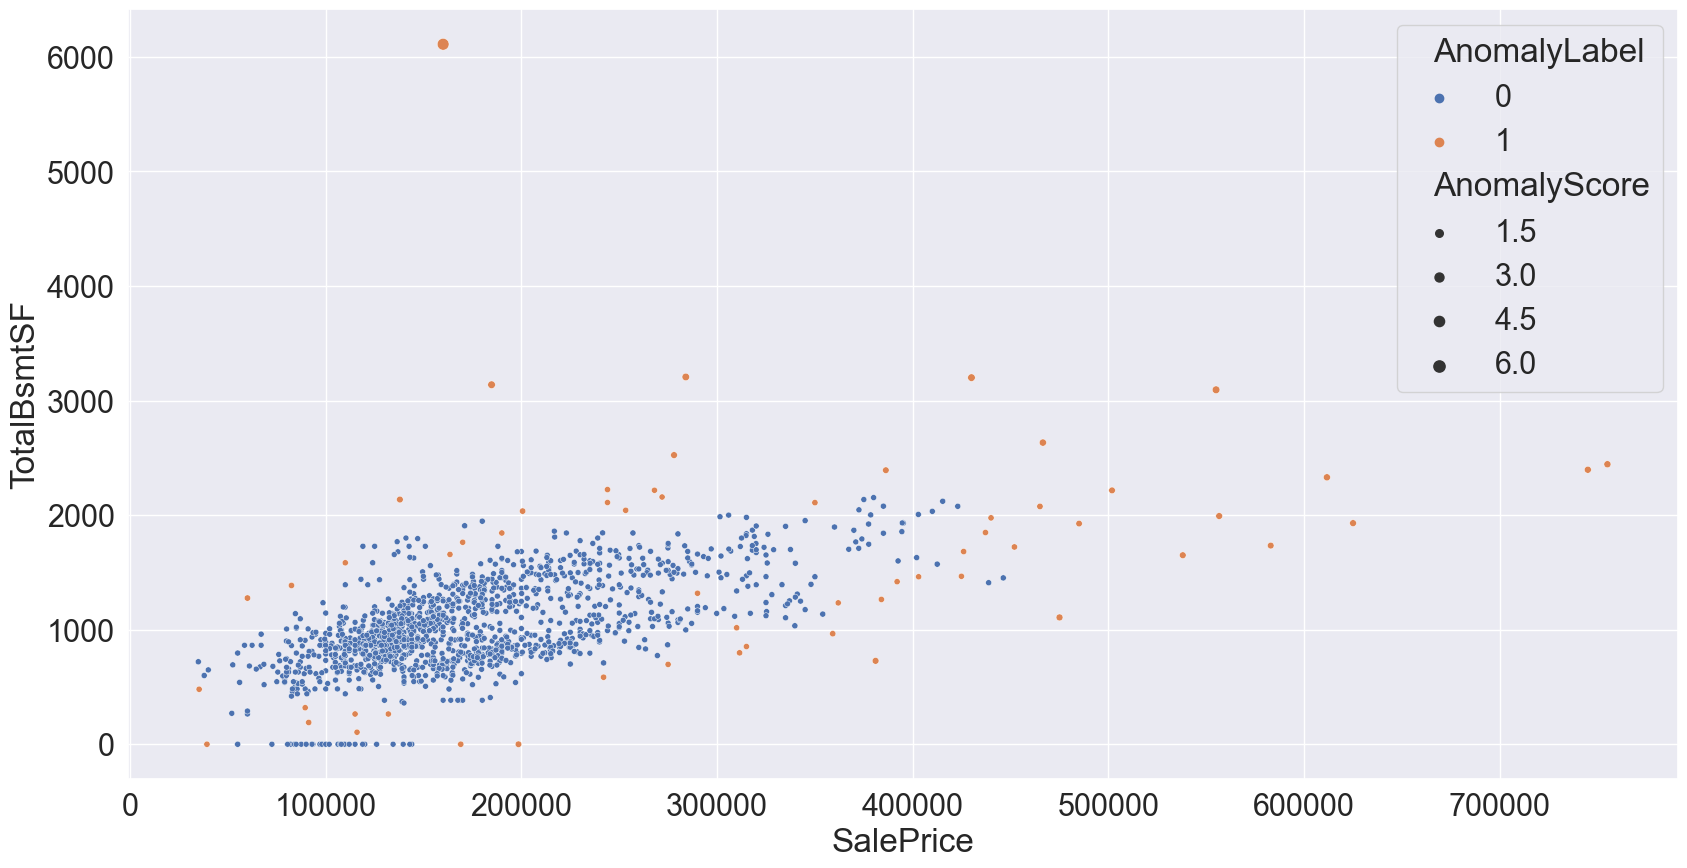

In [73]:
#K Nearest Neighbors
import pandas as pd
from pyod.models.knn import KNN
from pyod.utils.utility import standardizer
from pyod.utils.data import evaluate_print
df2=df[['SalePrice','TotalBsmtSF']]

dfn = standardizer(df2)
clf = KNN(n_neighbors=2,contamination=1/25,method='mean')
clf.fit(dfn)
df2['AnomalyScore'] = clf.decision_scores_
df2['AnomalyLabel'] = clf.labels_

df_knn=df2[df2.AnomalyLabel==0]
sns.scatterplot(data=df2,y='TotalBsmtSF',x='SalePrice',hue='AnomalyLabel',size='AnomalyScore')
plt.show()


C:\Users\ankommar\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


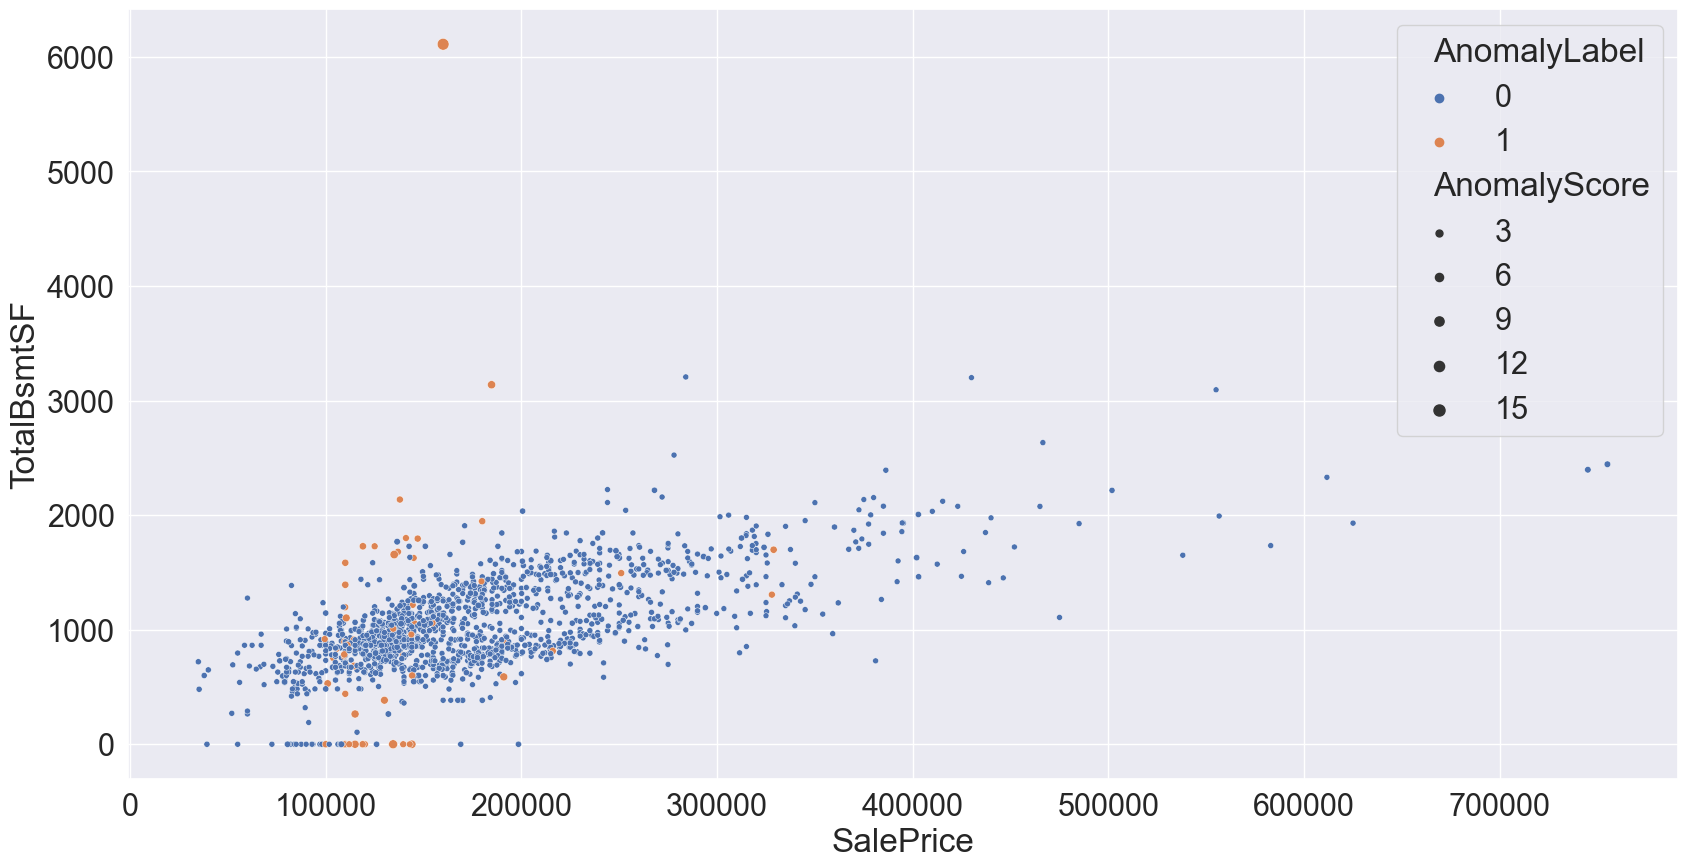

In [74]:
#Local Outlier Factor
import pandas as pd
from pyod.models.lof import LOF
from pyod.utils.utility import standardizer
from pyod.utils.data import evaluate_print
df2=df[['SalePrice','TotalBsmtSF']]

clf = LOF(n_neighbors=5,contamination=1/25)
clf.fit(df2)
df2['AnomalyScore'] = clf.decision_scores_
df2['AnomalyLabel'] = clf.labels_
sns.scatterplot(data=df2,y='TotalBsmtSF',x='SalePrice',hue='AnomalyLabel',size='AnomalyScore')
df_lof=df2[df2.AnomalyLabel==0]
plt.show()


C:\Users\ankommar\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


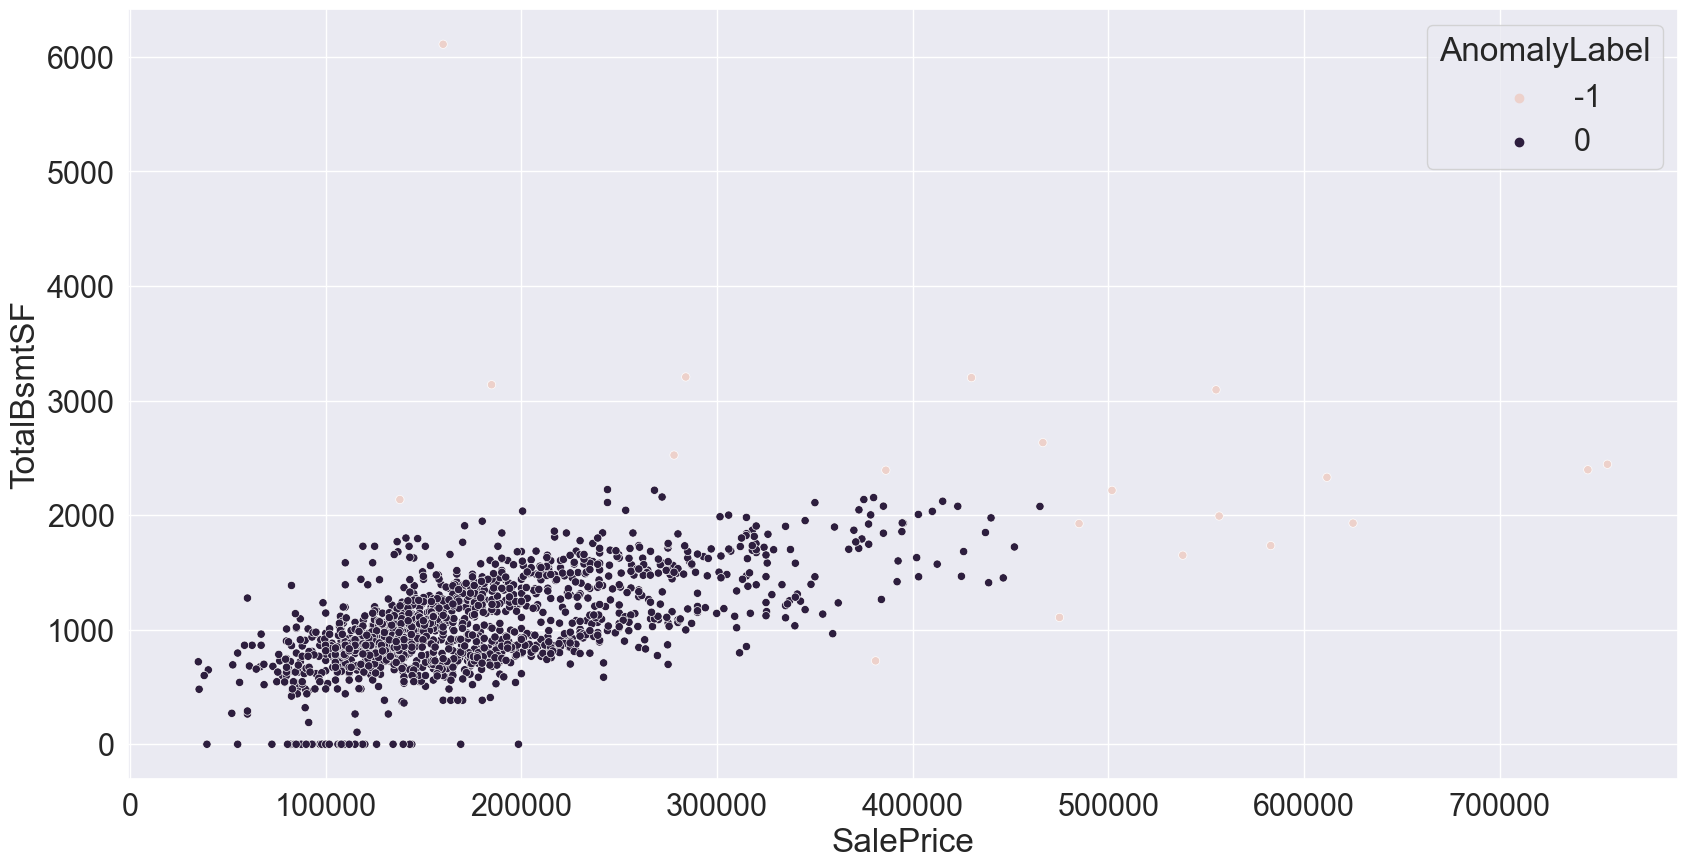

In [75]:
#DBSCAN
from sklearn.cluster import DBSCAN
from pyod.utils.utility import standardizer
import pandas as pd
from pyod.utils.utility import standardizer

df2=df[['SalePrice','TotalBsmtSF']]

dfn = standardizer(df2)
clustering = DBSCAN(eps=0.5, min_samples=4).fit(dfn)
anomaly_labels=clustering.labels_
anomaly_scores=clustering.labels_
df2['AnomalyLabel'] = anomaly_labels
sns.scatterplot(data=df2,y='TotalBsmtSF',x='SalePrice',hue='AnomalyLabel')
df_dbscan=df2[df2.AnomalyLabel==0]
plt.show()


C:\Users\ankommar\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


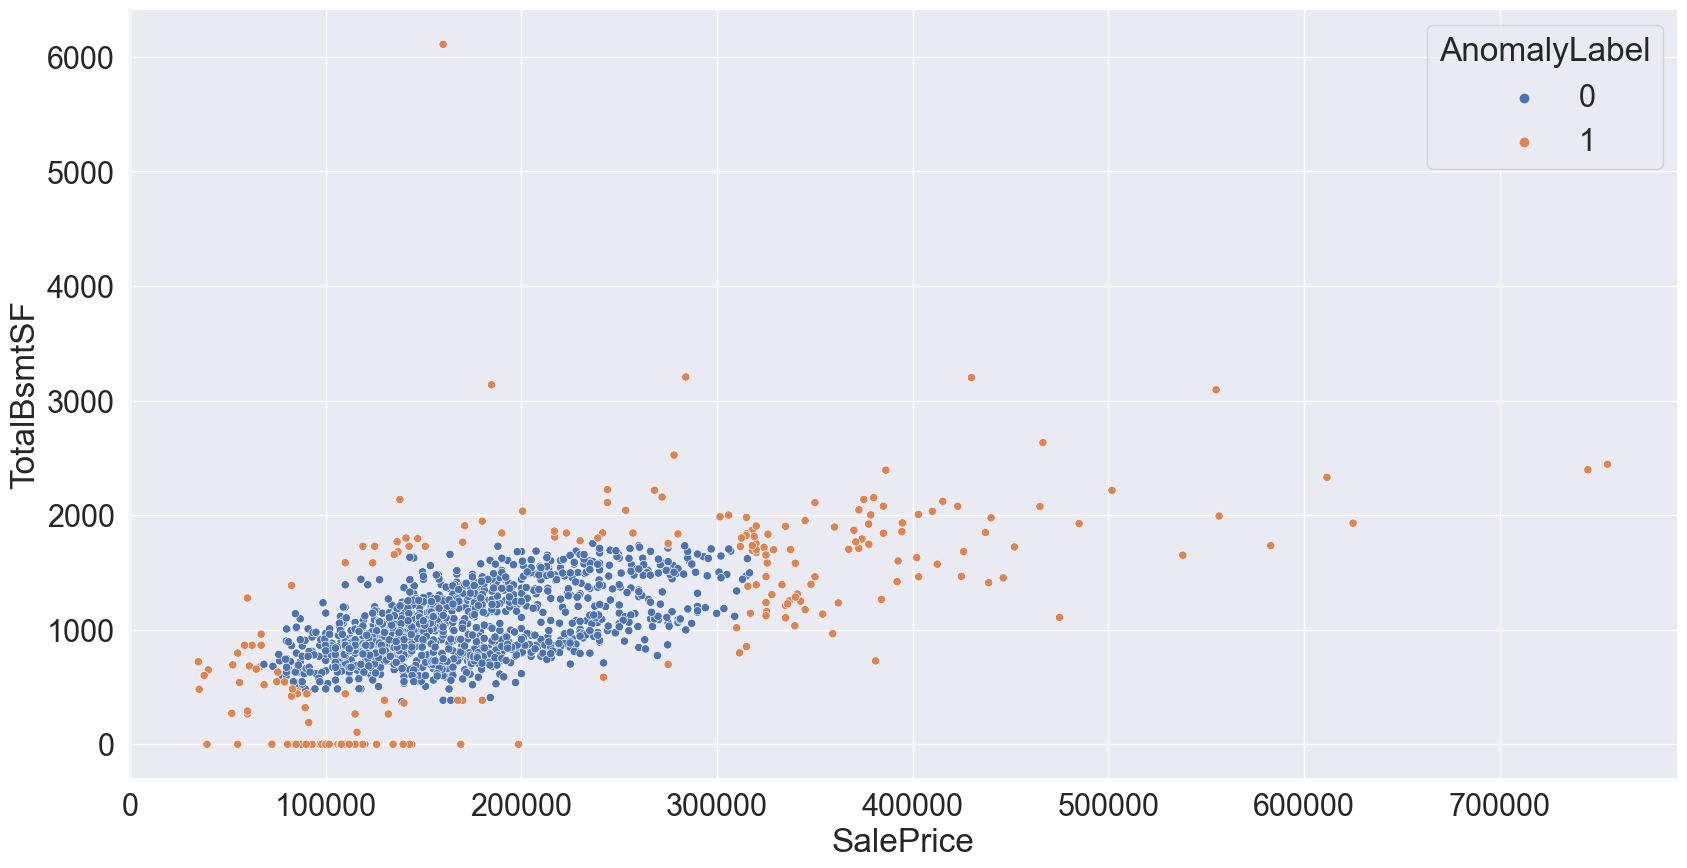

In [76]:
import pandas as pd
from pyod.models.iforest import IForest
from pyod.utils.utility import standardizer
from pyod.utils.data import evaluate_print
X=df2
# true_label=pd.read_csv("arrhythmia_true_labels.csv").to_numpy()
outliers_fraction =  0.15
# np.count_nonzero(true_label) / len(true_label)
X= standardizer(X)
# 100 trees, 256 subsamples
clf = IForest(contamination=outliers_fraction,n_estimators=100)
clf.fit(X)
anomaly_label=clf.labels_
# evaluate_print('IsolationForest', true_label, anomaly_label)
df2['AnomalyLabel'] = clf.labels_
sns.scatterplot(data=df2,y='TotalBsmtSF',x='SalePrice',hue='AnomalyLabel')
df_iso=df2[df2.AnomalyLabel==0]
plt.show()


C:\Users\ankommar\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


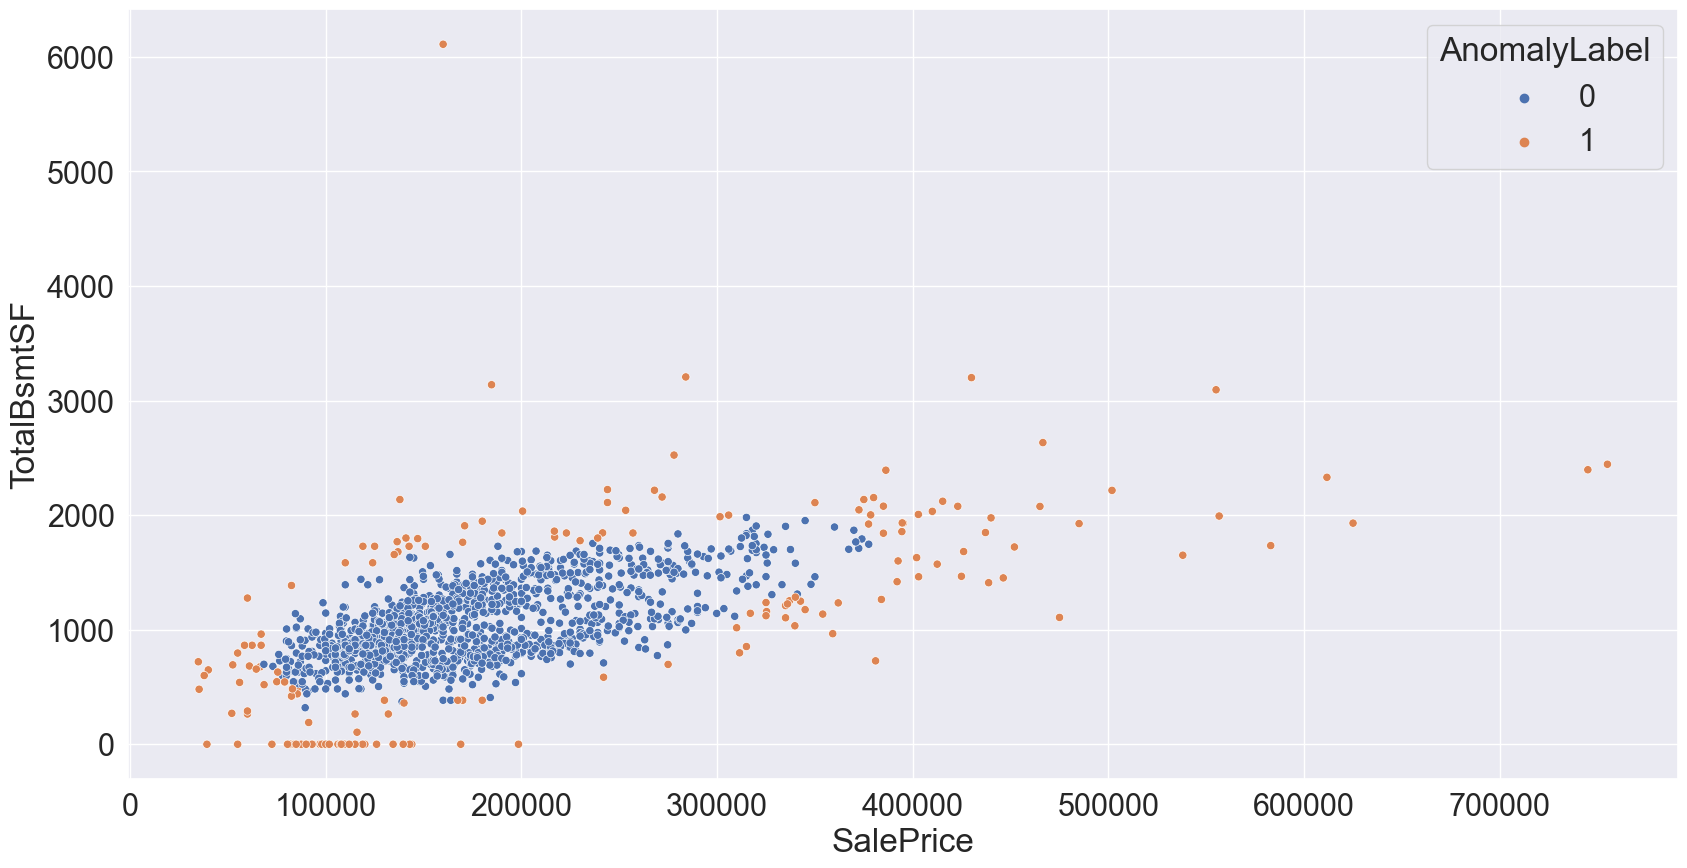

In [77]:
import pandas as pd
from pyod.models.ocsvm import OCSVM
from pyod.utils.utility import standardizer
from pyod.utils.data import evaluate_print
dfn = standardizer(df2)
clf = OCSVM(kernel ='rbf',contamination=3/25)
clf.fit(dfn)
df['AnomalyScore'] = clf.decision_scores_
df['AnomalyLabel'] = clf.labels_
df2['AnomalyLabel'] = clf.labels_
sns.scatterplot(data=df2,y='TotalBsmtSF',x='SalePrice',hue='AnomalyLabel')
df_ocsvm=df2[df2.AnomalyLabel==0]
plt.show()


In [78]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
from sklearn.model_selection import train_test_split

def lin_reg(df_reg, algo):
    X=df_reg['TotalBsmtSF']
    y=df_reg['SalePrice']
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.3)
    model.fit(X_train.to_numpy().reshape(-1, 1), y_train)
    from sklearn.metrics import mean_squared_error, r2_score
    predictions = model.predict(X_test.to_numpy().reshape(-1,1))
    r2 = r2_score(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions)

    print(algo, ':  The r2 is: ', r2)
    print(algo, ':  The rmse is: ', rmse)
plt.show()


In [79]:
mydict={'knn': df_knn, 'ocsvm': df_ocsvm, 'dbscan': df_dbscan, 'lof': df_lof, 'iso': df_iso}
for k in mydict.keys():
    lin_reg(mydict[k],k)

knn :  The r2 is:  0.42355730429457883
knn :  The rmse is:  2683516913.2659216
ocsvm :  The r2 is:  0.40131809354531656
ocsvm :  The rmse is:  2048103150.6712737
dbscan :  The r2 is:  0.4106728296842179
dbscan :  The rmse is:  2975696242.215948
lof :  The r2 is:  0.4228141419763265
lof :  The rmse is:  3374155311.127812
iso :  The r2 is:  0.29768873423016784
iso :  The rmse is:  1789550926.038893


In [80]:
import pkg_resources
import types
def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            # Split ensures you get root package, 
            # not just imported function
            name = val.__name__.split(".")[0]

        elif isinstance(val, type):
            name = val.__module__.split(".")[0]
            
        # Some packages are weird and have different
        # imported names vs. system/pip names. Unfortunately,
        # there is no systematic way to get pip names from
        # a package's imported name. You'll have to add
        # exceptions to this list manually!
        poorly_named_packages = {
            "PIL": "Pillow",
            "sklearn": "scikit-learn"
        }
        if name in poorly_named_packages.keys():
            name = poorly_named_packages[name]
            
        yield name
imports = list(set(get_imports()))

# The only way I found to get the version of the root package
# from only the name of the package is to cross-check the names 
# of installed packages vs. imported packages
requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name!="pip":
        requirements.append((m.project_name, m.version))

for r in requirements:
    print("{}=={}".format(*r))

statsmodels==0.12.2
seaborn==0.12.2
scipy==1.7.3
matplotlib==3.5.3
datasets==2.11.0
scikit-learn==1.0.2
pyod==0.8.6
pandas==1.3.0
numpy==1.21.6


statsmodels==0.12.2
seaborn==0.12.2
scipy==1.7.3
scikit-learn==0.24.0
numpy==1.20.0
matplotlib==3.5.3
datasets==2.11.0
pyod==0.8.6
pandas==1.3.0